## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline
import math

In [2]:
pd.set_option('display.max_rows', 200,'display.max_columns', 200)

### Columns descriptions

In [3]:
col_des_df = pd.read_csv('columns_description.csv')
col_des_df.drop(columns = 'Unnamed: 0', inplace=True)

In [4]:
print('Current application data description\n')
with pd.option_context('display.max_colwidth', -1):display(col_des_df[:122])

Current application data description



,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,application_data,AMT_ANNUITY,Loan annuity,NaN


In [5]:
print('Previous application data description\n')
with pd.option_context('display.max_colwidth', -1):display(col_des_df[122:])

Previous application data description



,Table,Row,Description,Special
122,previous_application.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
123,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
124,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
125,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
126,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
127,previous_application.csv,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
128,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
129,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
130,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,NaN
131,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


***

## [2. Data Cleaning](#Data-Cleaning)


### 2A. Current Applications

In [6]:
app_df_01 = pd.read_csv('application_data.csv')
app_df_01.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
print('Dataframe shape of current applications: {}'.format(app_df_01.shape))

Dataframe shape of current applications: (307511, 122)


In [8]:
app_df_01.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
app_df_01.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
# Percentage of null values
round(app_df_01.isnull().sum()/ len(app_df_01)*100, 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

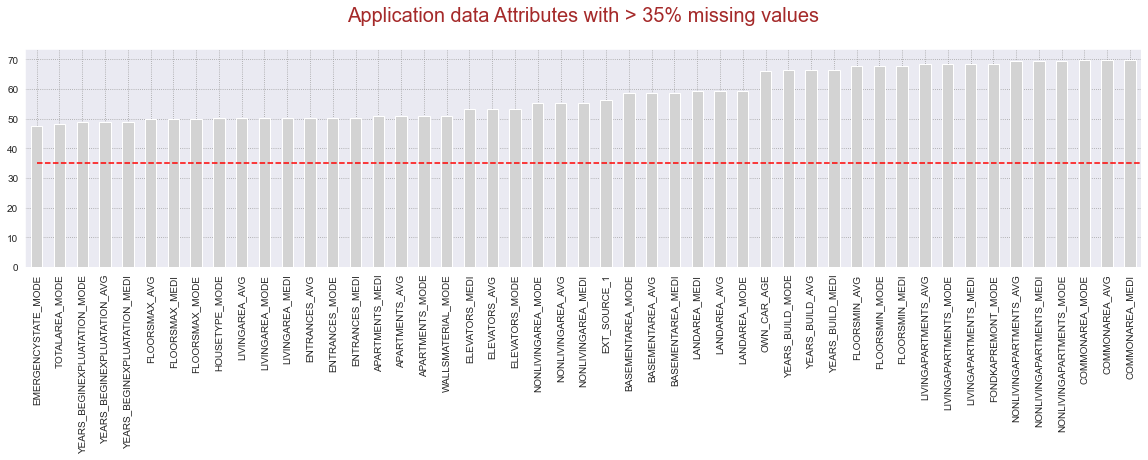

In [11]:
# Plotting the attributes with null values
app_df_NA = round(app_df_01.isnull().sum()/ len(app_df_01)*100, 2).sort_values(ascending = True)

plt.figure(figsize=(20,4))
app_df_NA[app_df_NA > 35].plot(kind = 'bar', color = 'lightgray')
plt.plot([0,70],[35,35], 'r--')
plt.title('Application data Attributes with > 35% missing values\n', fontdict={'fontsize':20, 
                                                                             'fontweight': 5, 'color':'brown'})
plt.show()

In [12]:
len(app_df_NA[app_df_NA > 35])

49

We are keeping the threshold or lower limit as 35% for missing values.<br>
More than that we'll be eliminating the attributes.<br>
There are 49 attributes with more than 35% of missing or null values.<br>
That's really high percentage of missing values.<br>
We can take a call to drop them.

As caution we will first peek into them.

In [13]:
# Columns with missing values 
app_df_01[app_df_NA[app_df_NA > 35].index].columns

Index(['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'HOUSETYPE_MODE',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'APARTMENTS_MODE', 'WALLSMATERIAL_MODE', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI',
       'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE', 'OWN_CAR_AGE',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONL

In [14]:
app_df_01[app_df_NA[app_df_NA > 35].index].describe()

,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,LIVINGAREA_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,ENTRANCES_AVG,ENTRANCES_MODE,ENTRANCES_MEDI,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,EXT_SOURCE_1,BASEMENTAREA_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,LANDAREA_MEDI,LANDAREA_AVG,LANDAREA_MODE,OWN_CAR_AGE,YEARS_BUILD_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,FLOORSMIN_AVG,FLOORSMIN_MODE,FLOORSMIN_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,COMMONAREA_MODE,COMMONAREA_AVG,COMMONAREA_MEDI
count,159080.000000,157504.000000,157504.000000,157504.000000,154491.000000,154491.000000,154491.000000,153161.000000,153161.000000,153161.000000,152683.000000,152683.000000,152683.000000,151450.000000,151450.00000,151450.000000,143620.000000,143620.000000,143620.000000,137829.000000,137829.000000,137829.000000,134133.000000,127568.000000,127568.000000,127568.000000,124921.000000,124921.000000,124921.000000,104582.000000,103023.000000,103023.000000,103023.000000,98869.000000,98869.000000,98869.000000,97312.000000,97312.000000,97312.000000,93997.000000,93997.000000,93997.000000,92646.000000,92646.000000,92646.000000
mean,0.102547,0.977065,0.977735,0.977752,0.226282,0.225897,0.222315,0.107399,0.105975,0.108607,0.149725,0.145193,0.149213,0.117850,0.11744,0.114231,0.078078,0.078942,0.074490,0.027022,0.028358,0.028236,0.502130,0.087543,0.088442,0.087955,0.067169,0.066333,0.064958,12.061091,0.759637,0.752471,0.755746,0.231894,0.228058,0.231625,0.100775,0.105645,0.101954,0.008809,0.008651,0.008076,0.042553,0.044621,0.044595
std,0.107462,0.064575,0.059223,0.059897,0.144641,0.145067,0.143709,0.110565,0.111845,0.112260,0.100049,0.100977,0.100368,0.109076,0.10824,0.107936,0.134467,0.134576,0.132256,0.070254,0.069523,0.070166,0.211062,0.084307,0.082438,0.082179,0.082167,0.081184,0.081750,11.944812,0.110111,0.113280,0.112066,0.161380,0.161160,0.161934,0.092576,0.097880,0.093642,0.047732,0.047415,0.046276,0.074445,0.076036,0.076144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.041200,0.976700,0.976700,0.976700,0.166700,0.166700,0.166700,0.045300,0.042700,0.045700,0.069000,0.069000,0.069000,0.058300,0.05770,0.052500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,0.040700,0.044200,0.043700,0.018700,0.018700,0.016600,5.000000,0.699400,0.687200,0.691400,0.083300,0.083300,0.083300,0.050400,0.054200,0.051300,0.000000,0.000000,0.000000,0.007200,0.007800,0.007900
50%,0.068800,0.981600,0.981600,0.981600,0.166700,0.166700,0.166700,0.074500,0.073100,0.074900,0.137900,0.137900,0.137900,0.086400,0.08760,0.084000,0.000000,0.000000,0.000000,0.001100,0.003600,0.003100,0.505998,0.074600,0.076300,0.075800,0.048700,0.048100,0.045800,9.000000,0.764800,0.755200,0.758500,0.208300,0.208300,0.208300,0.075600,0.077100,0.076100,0.000000,0.000000,0.000000,0.019000,0.021100,0.020800
75%,0.127600,0.986600,0.986600,0.986600,0.333300,0.333300,0.333300,0.129900,0.125200,0.130300,0.206900,0.206900,0.206900,0.148900,0.14850,0.143900,0.120000,0.120000,0.120800,0.023100,0.027700,0.026600,0.675053,0.112400,0.112200,0.111600,0.086800,0.085600,0.084100,15.000000,0.823600,0.823200,0.825600,0.375000,0.375000,0.375000,0.121000,0.131300,0.123100,0.003900,0.003900,0.003900,0.049000,0.051500,0.051300
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00

The data is mostly about Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor.<br>
All these columns seems excess and unnecessary.<br>
**In my opinion, we can drop them without a doubt.**

Let's drop them and create a fresh dataframe.

In [15]:
curr_app_df = app_df_01.drop(columns = app_df_01[app_df_NA[app_df_NA > 35].index])

In [16]:
curr_app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Let's now explore new dataframe further.

In [17]:
curr_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:
# Absolute number of null values 
curr_app_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [19]:
# Percenatge of null values
round(curr_app_df.isnull().sum() / len(curr_app_df) * 100, 3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_TYPE_SUITE                 0.420
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MOBILE                0.000
FLAG_PHONE                      0.000
FLAG_EMAIL  

EXT_SOURCE_2 has 0.21% of missing values respectively.<br>
There's seems to be no accurate description of these attributes.<br>
Also seems unnecessary for analysis.

In [20]:
curr_app_df[['EXT_SOURCE_2','EXT_SOURCE_3']].head()

,EXT_SOURCE_2,EXT_SOURCE_3
0,0.262949,0.139376
1,0.622246,NaN
2,0.555912,0.729567
3,0.650442,NaN
4,0.322738,NaN


Let's first check the relationship with *Target* variable.

<AxesSubplot:>

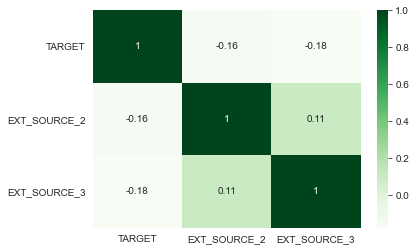

In [22]:
sns.heatmap(curr_app_df[['TARGET','EXT_SOURCE_2', 'EXT_SOURCE_3']].corr(), annot=True, cmap='Greens')

The above plots suggests that there's non-linear correlation of the variables with Target variable.<br>
We came to decision to drop them.

In [23]:
curr_app_df.drop(columns = ['EXT_SOURCE_2'], inplace=True)

 *** 

#### Imputing Null values 

<div class="alert alert-block alert-info">
We will be imputing only those attributes which are having significant percentage of missing values.<br>
Those below 1% can be safely kept untouched.
</div>

Following above approach there are total 7 attributes having significant missing values which can be handled.<br>
Let's check what are those and fix them.

`OCCUPATION_TYPE` has 31.35% of missing data.

In [24]:
curr_app_df.OCCUPATION_TYPE.head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

Categorical missing values can be imputed with mode.

In [25]:
curr_app_df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Imputing the missing values with mode ( which is 'Laborers' here ) or *Unknown* is not justified.<br>
We'll keep the values as it is.

***

`AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY`,` AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_QRT`, `AMT_REQ_CREDIT_BUREAU_YEAR` have 13.5% of missing values

In [26]:
curr_app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [27]:
# Let's view the percentage of null values again
curr_app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()/len(app_df_01)*100

AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

Looking at the results above we can assume that missing values means there were no enquiries.<br>
The missing values can be imputed with median i.e: 0.0

In [28]:
# Imputing null values 
curr_app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
             'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
             'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']] = curr_app_df[['AMT_REQ_CREDIT_BUREAU_HOUR',
                                                                                        'AMT_REQ_CREDIT_BUREAU_DAY',
                                                                                        'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                                                        'AMT_REQ_CREDIT_BUREAU_MON',
                                                                                        'AMT_REQ_CREDIT_BUREAU_QRT', 
                                                                                        'AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(0)

In [29]:
# Checking the count of null values
curr_app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

***

In [30]:
(curr_app_df.isnull().sum()/len(curr_app_df))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

`OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`, `NAME_TYPE_SUITE`, `DAYS_LAST_PHONE_CHANGE`, `CNT_FAM_MEMBERS`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `DAYS_EMPLOYED` have less than 1% missing values.<br>
As decided earlier we'll keep them as it is.

***


### Fixing data types and values

We will probe into data types and the values in attributes

In [31]:
curr_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [32]:
curr_app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Whichever columns related with days are negative, we'll convert them first into absolute values.<br>

In [33]:
curr_app_df[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


In [34]:
curr_app_df[['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION',
             'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']] = curr_app_df[['DAYS_BIRTH',
                                                                          'DAYS_EMPLOYED', 
                                                                          'DAYS_REGISTRATION',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'DAYS_LAST_PHONE_CHANGE']].abs()

We converted `DAYS_BIRTH` in years for easy readability.<br>
Also, notice we renamed the column to **AGE**.

In [35]:
curr_app_df['DAYS_BIRTH'] = curr_app_df['DAYS_BIRTH'].apply(lambda x: math.ceil(x/365))
curr_app_df['DAYS_EMPLOYED'] = curr_app_df['DAYS_EMPLOYED'].apply(lambda x: math.ceil(x/365))

In [36]:
# Renaming the DAYS_BIRTH to AGE
curr_app_df.rename(columns={'DAYS_BIRTH' : 'AGE', 'DAYS_EMPLOYED' : 'YEARS_EMPLOYED'}, inplace=True)

In [37]:
curr_app_df[['AGE','YEARS_EMPLOYED', 'DAYS_REGISTRATION',
             'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head()

,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,26,2,3648.0,2120,1134.0
1,46,4,1186.0,291,828.0
2,53,1,4260.0,2531,815.0
3,53,9,9833.0,2437,617.0
4,55,9,4311.0,3458,1106.0


It looks that `DAYS_REGISTRATION` AND `DAYS_LAST_PHONE_CHANGE` are **float** instead of **int**.<br>
Let's convert them.

In [38]:
curr_app_df['DAYS_REGISTRATION'] = curr_app_df.DAYS_REGISTRATION.astype('int64')

In [39]:
curr_app_df['DAYS_LAST_PHONE_CHANGE'] = curr_app_df.DAYS_LAST_PHONE_CHANGE.astype('Int64')

In [40]:
curr_app_df[['AGE','YEARS_EMPLOYED', 'DAYS_REGISTRATION',
             'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].dtypes

AGE                       int64
YEARS_EMPLOYED            int64
DAYS_REGISTRATION         int64
DAYS_ID_PUBLISH           int64
DAYS_LAST_PHONE_CHANGE    Int64
dtype: object

***

Converting `CNT_FAM_MEMBERS` to **int** datatype.

In [41]:
curr_app_df['CNT_FAM_MEMBERS'] = curr_app_df.CNT_FAM_MEMBERS.astype('Int64')

We haven't handled missing values earlier for this feature.<br>
It is seen that this attribute depends on age.

In [42]:
curr_app_df[['CODE_GENDER', 'AGE', 'CNT_FAM_MEMBERS']][curr_app_df.CNT_FAM_MEMBERS.isnull()]

,CODE_GENDER,AGE,CNT_FAM_MEMBERS
41982,M,34,<NA>
187348,F,36,<NA>


Therer are only two missing values and also there might be various reasons to not have family members.<br>
So, it's better to keep it as it is.

***

In [43]:
curr_app_df.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

`OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_30_CNT_SOCIAL_CIRCLE`,
`OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`,
`AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY`,
`AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_MON`,
`AMT_REQ_CREDIT_BUREAU_QRT`, `AMT_REQ_CREDIT_BUREAU_YEAR`<br>
These need to be change to **int**.

In [44]:
curr_app_df[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']] = curr_app_df[['OBS_30_CNT_SOCIAL_CIRCLE',
                                                                                  'DEF_30_CNT_SOCIAL_CIRCLE',
                                                                                  'OBS_60_CNT_SOCIAL_CIRCLE',
                                                                                  'DEF_60_CNT_SOCIAL_CIRCLE',
                                                                                  'AMT_REQ_CREDIT_BUREAU_HOUR',
                                                                                  'AMT_REQ_CREDIT_BUREAU_DAY',
                                                                                  'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                                                  'AMT_REQ_CREDIT_BUREAU_MON',
                                                                                  'AMT_REQ_CREDIT_BUREAU_QRT',
                                                                                  'AMT_REQ_CREDIT_BUREAU_YEAR']].astype('Int64')

If we observe there are flags columns which as the name suggests will have true or false indicators for the attributes.<br>
Also, our Target variable has 0's and 1's; this will conflict with the flag columns while analysis. So, we'll transform those columns with Y/N, for easy interpretability while analysis.<br>
0, N = same<br>
1, Y = different

Let's first check which other columns are binary.

In [45]:
# Checking the unique values in flag columns
curr_app_df.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
AGE                                50
YEARS_EMPLOYED                     52
DAYS_REGISTRATION               15687
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

Checking columns with 3 unique values before heading further just to be sure that they are distinct.

In [46]:
curr_app_df.nunique() == 3


SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                     True
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                    False
AMT_GOODS_PRICE                False
NAME_TYPE_SUITE                False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
AGE                            False
YEARS_EMPLOYED                 False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
O

`CODE_GENDER`, `REGION_RATING_CLIENT`, `REGION_RATING_CLIENT_W_CITY` contains 3 unique values.<br>
Let's check what are those.

In [47]:
curr_app_df[['CODE_GENDER']].value_counts()

CODE_GENDER
F              202448
M              105059
XNA                 4
dtype: int64

In [48]:
curr_app_df['REGION_RATING_CLIENT'].value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [49]:
curr_app_df['REGION_RATING_CLIENT_W_CITY'].value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

These look fine. There is no need to fix them.

We can move further with our task now.

In [50]:
# replacing columns with binary values to Y, N 
curr_app_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
     'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
     'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
     'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
     'FLAG_DOCUMENT_2' ,'FLAG_DOCUMENT_3' ,'FLAG_DOCUMENT_4' ,'FLAG_DOCUMENT_5',
     'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
     'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
     'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
     'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
            ]] = curr_app_df[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE',
                              'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                              'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                              'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                              'LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2' ,'FLAG_DOCUMENT_3' ,'FLAG_DOCUMENT_4' ,
                              'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                              'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
                              'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
                              'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
                              'FLAG_DOCUMENT_21']].replace([0, 1], ['N', 'Y'])

 _ _ _ 

#### Categorizing and binning 

`AMT_INCOME_TOTAL`,`AMT_CREDIT`, `AMT_GOODS_PRICE` has continuous values, also these are very high and difficult to understand.<br>
Inorder to make our EDA more understandable we are binning them.

In [51]:
curr_app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,44.433090,186.019544,4986.120327,2994.202373,2.152665,2.052463,2.031521,12.063419,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,11.954493,381.973113,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,35.000000,3.000000,2010.000000,1720.000000,2.000000,2.000000,2.000000,10.000000,0.370650,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,44.000000,7.000000,4504.000000,3254.000000,2.000000,2.000000,2.000000,12.000000,0.535276,0.000000,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,54.000000,16.000000,7479.500000,4299.000000,3.000000,2.000000,2.000000,14.000000,0.669057,2.000000,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,70.000000,1001.000000,24672.000000,7197.000000,20.000000,3.000000,3.000000,23.000000,0.896010,348.000000,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [52]:
# standardizing 
curr_app_df['AMT_INCOME_TOTAL'] = curr_app_df['AMT_INCOME_TOTAL']/100000

# Adding new column as income range
curr_app_df['INCOME_RANGE_LAKHS'] = pd.cut(curr_app_df.AMT_INCOME_TOTAL, bins = [0,1,2,3,4,5,6,7,8,9,10,2000], #the max value is 1170 hence, capping at 2000 
                                         labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8','8-9', '9-10', '10+'])

In [53]:
curr_app_df['INCOME_RANGE_LAKHS'].value_counts(normalize=True)*100

1-2     50.696723
2-3     21.194689
0-1     20.714056
3-4      4.772512
4-5      1.743352
5-6      0.356085
6-7      0.282592
8-9      0.096907
10+      0.081298
7-8      0.052681
9-10     0.009105
Name: INCOME_RANGE_LAKHS, dtype: float64

In [54]:
# standardizing 
curr_app_df['AMT_CREDIT'] = curr_app_df['AMT_CREDIT']/100000

# Adding new column as credit range
curr_app_df['CREDIT_RANGE_LAKHS'] = pd.cut(curr_app_df.AMT_CREDIT, bins = [0,1,2,3,4,5,6,7,8,9,10,100], 
                                          labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8','8-9', '9-10', '10+'])

In [55]:
curr_app_df['CREDIT_RANGE_LAKHS'].value_counts(normalize=True)*100

2-3     17.824728
10+     16.254703
5-6     11.131960
4-5     10.418489
1-2      9.801275
3-4      8.564897
6-7      7.820533
8-9      7.086576
7-8      6.241403
9-10     2.902986
0-1      1.952450
Name: CREDIT_RANGE_LAKHS, dtype: float64

In [56]:
# standardizing 
curr_app_df['AMT_GOODS_PRICE'] = curr_app_df['AMT_GOODS_PRICE']/100000

# Adding new column as credit range
curr_app_df['GOODS_PRICE_RANGE_LAKHS'] = pd.cut(curr_app_df.AMT_GOODS_PRICE, bins = [0,1,2,3,4,5,6,7,8,9,10,100], 
                                          labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8','8-9', '9-10', '10+'])

In [57]:
curr_app_df['GOODS_PRICE_RANGE_LAKHS'].value_counts(normalize=True)*100

2-3     20.427819
4-5     18.543906
6-7     13.027246
10+     11.105252
1-2     10.726712
8-9      6.992738
3-4      6.906485
5-6      4.269398
0-1      2.834656
7-8      2.639690
9-10     2.526096
Name: GOODS_PRICE_RANGE_LAKHS, dtype: float64

Binning `AGE` variable.

In [58]:
# Age range lies between 11 and 70
# We'll be dividing ages in groups of range 5 
curr_app_df['AGE_GROUP'] = pd.cut(curr_app_df['AGE'], bins= [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100],
                            labels = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60+" ])

In [59]:
 curr_app_df.AGE_GROUP.value_counts(normalize=True)*100

35-40    13.940314
40-45    13.464884
30-35    12.825557
60+      11.569993
45-50    11.425608
50-55    11.362846
55-60    10.770346
25-30    10.686447
20-25     3.954005
0-20      0.000000
Name: AGE_GROUP, dtype: float64

#### Checking for Outliers

Let's check the dataframe 

In [60]:
curr_app_df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE_LAKHS,CREDIT_RANGE_LAKHS,GOODS_PRICE_RANGE_LAKHS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,2,3648,2120,Y,Y,N,Y,Y,N,Laborers,1,2,2,WEDNESDAY,10,N,N,N,N,N,N,Business Entity Type 3,0.139376,2,2,2,2,1134,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,0,0,0,0,1,2-3,4-5,3-4,25-30
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,46,4,1186,291,Y,Y,N,Y,Y,N,Core staff,2,1,1,MONDAY,11,N,N,N,N,N,N,School,NaN,1,0,1,0,828,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,0,0,0,0,0,2-3,10+,10+,45-50
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,53,1,4260,2531,Y,Y,Y,Y,Y,N,Laborers,1,2,2,MONDAY,9,N,N,N,N,N,N,Government,0.729567,0,0,0,0,815,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,0,0,0,0,0,0-1,1-2,1-2,50-55


In [61]:
curr_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

Describing the dataframe will provide us rough insight about the variables which we can explore further for outlier detection.

In [62]:
curr_app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.573909,5.383962,0.020868,44.433090,186.019544,4986.120327,2994.202373,2.152665,2.052463,2.031521,12.063419,0.510853,1.422245,0.143421,1.405292,0.100049,962.858788,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.737315,3.694465,0.013831,11.954493,381.973113,3522.886321,1509.450419,0.910682,0.509034,0.502737,3.265832,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,35.000000,3.000000,2010.000000,1720.000000,2.000000,2.000000,2.000000,10.000000,0.370650,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,44.000000,7.000000,4504.000000,3254.000000,2.000000,2.000000,2.000000,12.000000,0.535276,0.000000,0.000000,0.000000,0.000000,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,54.000000,16.000000,7479.500000,4299.000000,3.000000,2.000000,2.000000,14.000000,0.669057,2.000000,0.000000,2.000000,0.000000,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,70.000000,1001.000000,24672.000000,7197.000000,20.000000,3.000000,3.000000,23.000000,0.896010,348.000000,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


`AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `YEARS_EMPLOYED`, `DAYS_REGISTRATION`
have significant gap between 75th percentile and max.<br>
Let's check these variables.

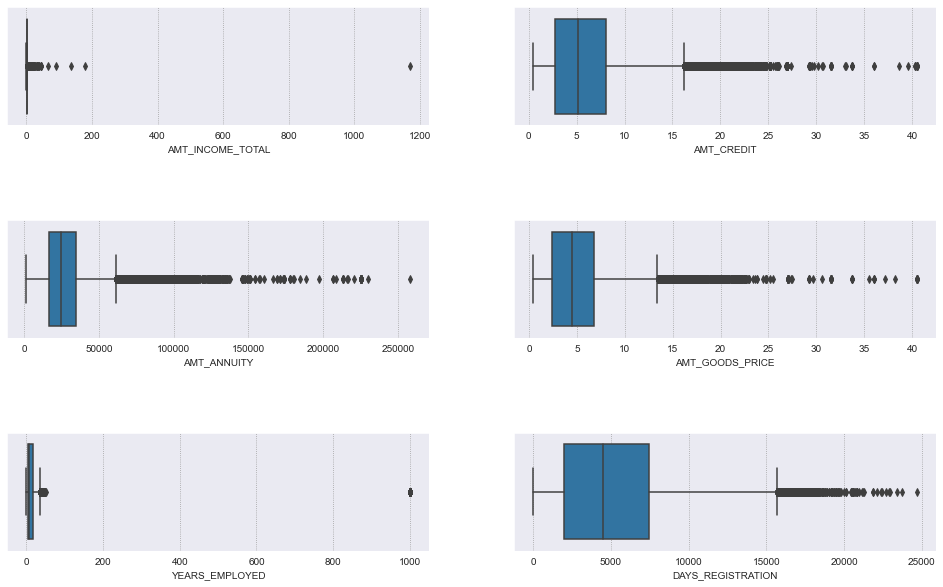

In [63]:
# Boxplot AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

f, axes = plt.subplots(3,2)
f.set_figheight(10)
f.set_figwidth(15)
sns.boxplot(x = 'AMT_INCOME_TOTAL', data = curr_app_df, ax = axes[0,0])
sns.boxplot(x = 'AMT_CREDIT', data = curr_app_df, ax = axes[0,1])
sns.boxplot(x = 'AMT_ANNUITY', data = curr_app_df, ax = axes[1,0])
sns.boxplot(x = 'AMT_GOODS_PRICE', data = curr_app_df, ax = axes[1,1])
sns.boxplot(x = 'YEARS_EMPLOYED', data = curr_app_df, ax = axes[2,0])
sns.boxplot(x = 'DAYS_REGISTRATION', data = curr_app_df, ax = axes[2,1])


f.subplots_adjust(left=0.04,hspace=0.8)

plt.show()

<div class="alert alert-block alert-success">
    
- It is seen that `AMT_CREDIT`,`AMT_ANNUITY`,`AMT_GOODS_PRICE` has some outliers.
    
- `AMT_INCOME_TOTAL` has the most outliers. This tells us that there are applicants whose income is high to very high as compared with the rest.
    
- Coming to `YEARS_EMPLOYED` it has an outlier and the value is close to 1000 which doesn't make any sense. Reasons might be retirement, incorrect information fed into system.
    
- Moving on futher, `DAYS_REGISTRATION` has no outliers as such.
    
</div>

### 2B. Previous Applications 

In [64]:
# Reading the data
prev_app_df_1 = pd.read_csv('previous_application.csv')
prev_app_df_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Checking dataframe shape
print('Dataframe shape of previous application: {}'.format(prev_app_df_1.shape))

Dataframe shape of previous application: (1670214, 37)


In [66]:
prev_app_df_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [67]:
# Statistical description of data the data
prev_app_df_1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [68]:
# Absolute null values
prev_app_df_1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [69]:
# Percentage of null values
round(prev_app_df_1.isnull().sum()/len(prev_app_df_1)*100, 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

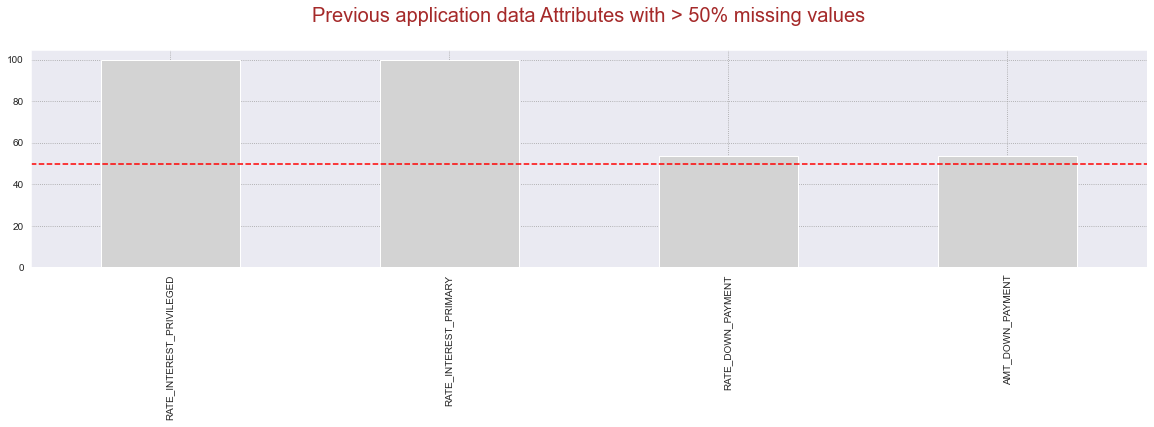

In [70]:
prev_app_NA = round(prev_app_df_1.isnull().sum()/len(prev_app_df_1)*100, 2).sort_values(ascending = False) 

plt.figure(figsize=(20,4))
prev_app_NA[prev_app_NA > 50].plot(kind = 'bar', color = 'lightgray')
plt.plot([-5,70],[50,50], 'r--')
plt.title('Previous application data Attributes with > 50% missing values\n', fontdict={'fontsize':20, 
                                                                             'fontweight': 5, 'color':'brown'})
plt.show()

<div class="alert alert-block alert-info">
Since this is historical data a lot of variables even though having upto 50% missing values will be useful for analysis. Therefore the threshold for removing attributes with missing values is 50%.<br>
Again, we are going to keep the attributes having missing values below 1% as it is.
</div>

Out of 37 total columns 4 attributes are candidates for elimination.<br>
Those are `RATE_INTEREST_PRIVILEGED`, `RATE_INTEREST_PRIMARY`,
        `RATE_DOWN_PAYMENT`, `AMT_DOWN_PAYMENT`.

#### Exploring the columns with missing values


In [72]:
# dropping RATE_INTEREST_PRIVILEGED, RATE_INTEREST_PRIMARY, RATE_DOWN_PAYMENT, AMT_DOWN_PAYMENT
# Creating Fresh dataframe
prev_app_df = prev_app_df_1.drop(columns = ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT'])

In [73]:
# Let's view the new dataframe first few rows
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Shape of new dataframe
print('Shape of previous applications new dataframe: {} '.format(prev_app_df.shape))

Shape of previous applications new dataframe: (1670214, 33) 


`WEEKDAY_APPR_PROCESS_START`, `HOUR_APPR_PROCESS_START`, `FLAG_LAST_APPL_PER_CONTRACT`,	`NFLAG_LAST_APPL_IN_DAY` seems unnecessary. Hence, chopping them off!!!

In [75]:
prev_app_df.drop(columns = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                            'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'], inplace=True)

***

#### Imputing Null values

In [76]:
# Calculating percentage of missing values in new dataframe
(prev_app_df.isnull().sum()/len(prev_app_df) * 100).sort_values(ascending=False)

NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
CHANNEL_TYPE                  0.000000
NAME_YIELD_GROUP              0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
SK_ID_PREV                    0.000000
NAME_PRODUCT_TYPE             0.000000
NAME_PORTFOLIO                0.000000
SK_ID_CURR                    0.000000
NAME_CLIENT_TYPE              0.000000
CODE_REJECT_REASON            0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION                 0.000000
NAME_CONTRACT_STATUS          0.000000
NAME_CASH_LOAN_PURPOSE   

Attributes with missing values to be handled / imputed are: `NAME_TYPE_SUITE`, `DAYS_FIRST_DRAWING`, `DAYS_TERMINATION`, `DAYS_LAST_DUE`, `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_FIRST_DUE`, `NFLAG_INSURED_ON_APPROVAL`, `AMT_GOODS_PRICE`, `AMT_ANNUITY`, `CNT_PAYMENT`     

`NAME_TYPE_SUITE ` is the only categorical variable to be handled here.


In [77]:
prev_app_df.NAME_TYPE_SUITE.value_counts(normalize = True)

Unaccompanied      0.598923
Family             0.250954
Spouse, partner    0.078922
Children           0.037145
Other_B            0.020739
Other_A            0.010681
Group of people    0.002636
Name: NAME_TYPE_SUITE, dtype: float64

As we can't guess Who accompanied client when applying for the previous application.<br>
It's better to fill the null values with **Unknown**.
Else, if we fill with mode the attribute values will be unreliable.

In [78]:
# Filling null values in NAME_TYPE_SUITE with most occuring value/ mode
prev_app_df.NAME_TYPE_SUITE.fillna('Unknown', inplace=True)

***

Columns with 'DAYS' prefix have negative values.<br>
So, first we need to convert them to absolute values.

In [79]:
# Conveting negative values to abs in columns with prefix as 'DAYS'
prev_app_df[['DAYS_FIRST_DRAWING', 'DAYS_TERMINATION', 'DAYS_LAST_DUE',
             'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE']] = prev_app_df[['DAYS_FIRST_DRAWING', 'DAYS_TERMINATION',
                                                                            'DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION',
                                                                            'DAYS_FIRST_DUE']].abs()

In [80]:
prev_app_df[['DAYS_FIRST_DRAWING', 'DAYS_TERMINATION', 'DAYS_LAST_DUE',
             'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE']] .describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE
count,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,342340.056543,83505.775017,78152.730207,35163.363265,15949.224065
std,88413.495220,152484.418802,148833.342466,106405.950190,72007.270877
min,2.000000,2.000000,2.000000,0.000000,2.000000
25%,365243.000000,447.000000,455.000000,257.000000,475.000000
50%,365243.000000,1171.000000,1155.000000,741.000000,921.000000
75%,365243.000000,2501.000000,2418.000000,1735.000000,1825.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


These attributes are subjective to the client and the lender.<br>
Hence, we'll keep the missing vales in these variables untouched.

***

`NFLAG_INSURED_ON_APPROVAL`

In [81]:
prev_app_df.NFLAG_INSURED_ON_APPROVAL.value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

About 66% of clients didn't opted for insurance upon approval of loan.<br>
But again this is subjective and if imputed may affect our analysis. Therefore leaving it as it is.

***

`AMT_GOODS_PRICE`, `AMT_ANNUITY`

In [82]:
# Statistical description
prev_app_df[['AMT_GOODS_PRICE', 'AMT_ANNUITY']].describe()

,AMT_GOODS_PRICE,AMT_ANNUITY
count,1.284699e+06,1.297979e+06
mean,2.278473e+05,1.595512e+04
std,3.153966e+05,1.478214e+04
min,0.000000e+00,0.000000e+00
25%,5.084100e+04,6.321780e+03
50%,1.123200e+05,1.125000e+04
75%,2.340000e+05,2.065842e+04
max,6.905160e+06,4.180581e+05


In [83]:
# Mode
prev_app_df[['AMT_GOODS_PRICE', 'AMT_ANNUITY']].mode()

,AMT_GOODS_PRICE,AMT_ANNUITY
0,45000.0,2250.0


Here, it is observed that the mean, median and mode of both attributes are varying respectively.<br>
Plotting a histogram will give clearer picture of what's happening here.

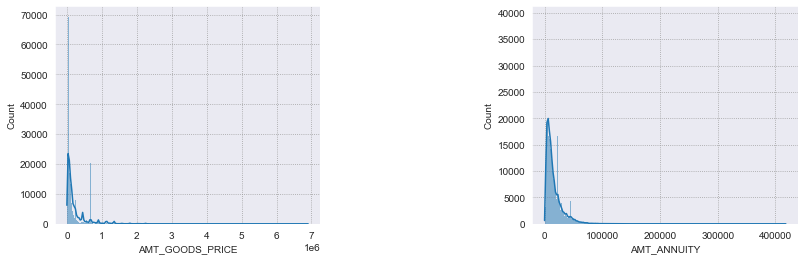

In [84]:
f, axs = plt.subplots(1,2)
f.set_figheight(4)
f.set_figwidth(12)
sns.histplot(x = 'AMT_GOODS_PRICE', data = prev_app_df,kde = True, ax = axs[0])
sns.histplot(x = 'AMT_ANNUITY', data = prev_app_df, kde = True, ax = axs[1])

f.subplots_adjust(left=0.04,wspace=0.8,hspace=0.8)
plt.show()

<div class="alert alert-block alert-warning">

It's a tough situation here.<br> There's high likelihood of data for these variables getting biased with any of the mean and median based imputation.<br>
Therefore we'll be trying all the three, compare them with the actual distribution prior to imputation and then come to definite conclusion

STEPS FOLLOWED:
1. We'll create sepearte dataframe for the imputed values each for mean, median and mode for AMT_GOODS_PRICE & AMT_ANNUITY
2. Decribe them and compare
3. If the description is similar to actual description prior to imputation then select the appropriate method for imputation.
4. Imputing with the selected method in main dataframe.

`AMT_GOODS_PRICE`

In [85]:
temp_mean = prev_app_df[[ 'AMT_GOODS_PRICE','AMT_ANNUITY']].fillna({'AMT_GOODS_PRICE': prev_app_df.AMT_GOODS_PRICE.mean(),
                                                                   'AMT_ANNUITY': prev_app_df.AMT_ANNUITY.mean()})

temp_median = prev_app_df[[ 'AMT_GOODS_PRICE','AMT_ANNUITY']].fillna({'AMT_GOODS_PRICE': prev_app_df.AMT_GOODS_PRICE.median(),
                                                                   'AMT_ANNUITY': prev_app_df.AMT_ANNUITY.median()})

temp_mode = prev_app_df[[ 'AMT_GOODS_PRICE','AMT_ANNUITY']].fillna({'AMT_GOODS_PRICE': prev_app_df.AMT_GOODS_PRICE.mode()[0],
                                                                   'AMT_ANNUITY': prev_app_df.AMT_ANNUITY.mode()[0]})

In [86]:
# Statistical description
print('Actual data description:\n\n{}, \n\nMode: {}'.format(prev_app_df[['AMT_GOODS_PRICE', 'AMT_ANNUITY']].describe(),
                                                           prev_app_df[['AMT_GOODS_PRICE', 'AMT_ANNUITY']].mode()))


Actual data description:

       AMT_GOODS_PRICE   AMT_ANNUITY
count     1.284699e+06  1.297979e+06
mean      2.278473e+05  1.595512e+04
std       3.153966e+05  1.478214e+04
min       0.000000e+00  0.000000e+00
25%       5.084100e+04  6.321780e+03
50%       1.123200e+05  1.125000e+04
75%       2.340000e+05  2.065842e+04
max       6.905160e+06  4.180581e+05, 

Mode:    AMT_GOODS_PRICE  AMT_ANNUITY
0          45000.0       2250.0


In [87]:
print('Mean imputation of data description:\n\n{}, \n\nMode: {}'.format(temp_mean.describe(), temp_mean.mode()))

Mean imputation of data description:

       AMT_GOODS_PRICE   AMT_ANNUITY
count     1.670214e+06  1.670214e+06
mean      2.278473e+05  1.595512e+04
std       2.766123e+05  1.303122e+04
min       0.000000e+00  0.000000e+00
25%       6.750000e+04  7.547096e+03
50%       1.728000e+05  1.544967e+04
75%       2.278473e+05  1.682403e+04
max       6.905160e+06  4.180581e+05, 

Mode:    AMT_GOODS_PRICE   AMT_ANNUITY
0    227847.279283  15955.120659


In [88]:
print('Median imputation of data description:\n\n{}, \n\nMode: {}'.format(temp_median.describe(), temp_median.mode()))

Median imputation of data description:

       AMT_GOODS_PRICE   AMT_ANNUITY
count     1.670214e+06  1.670214e+06
mean      2.011815e+05  1.490651e+04
std       2.808629e+05  1.317751e+04
min       0.000000e+00  0.000000e+00
25%       6.750000e+04  7.547096e+03
50%       1.123200e+05  1.125000e+04
75%       1.804050e+05  1.682403e+04
max       6.905160e+06  4.180581e+05, 

Mode:    AMT_GOODS_PRICE  AMT_ANNUITY
0         112320.0      11250.0


In [89]:
print('Mode imputation of data description:\n\n{}, \n\nMode: {}'.format(temp_mode.describe(), temp_mode.mode()))

Mode imputation of data description:

       AMT_GOODS_PRICE   AMT_ANNUITY
count     1.670214e+06  1.670214e+06
mean      1.856429e+05  1.290071e+04
std       2.871413e+05  1.422478e+04
min       0.000000e+00  0.000000e+00
25%       4.500000e+04  2.250000e+03
50%       7.105050e+04  8.250255e+03
75%       1.804050e+05  1.682403e+04
max       6.905160e+06  4.180581e+05, 

Mode:    AMT_GOODS_PRICE  AMT_ANNUITY
0          45000.0       2250.0


Now honestly we need domain expertise guidance here or else we can blindly fill with median.<br>
But in my opinion it's better to not play with the missing values here

***

`CNT_PAYMENT`

In [90]:
prev_app_df.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [91]:
prev_app_df.CNT_PAYMENT.value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
19.0         6
32.0         6
34.0         4
59.0         4
21.0         3
41.0         3
47.0         3
45.0         3
44.0         2
38.0         2
39.0         2
46.0         2
53.0         1
33.0         1
40.0         1
Name: CNT_PAYMENT, dtype: int64

There's a value 0 which means the application might have been cancelled, refused.<br>
Let's look for it's evidence.

In [92]:
# Count of NAME_CONTACT_STATUS where values of CNT_PAYMENT are null
prev_app_df[['NAME_CONTRACT_STATUS']][prev_app_df.CNT_PAYMENT == 0].value_counts()

NAME_CONTRACT_STATUS
Approved                97771
Refused                 46739
Canceled                  473
Unused offer                2
dtype: int64

Refused, cancelled and unused will ofcourse not have started the term.<br>
Let's check the status where the values are null.

In [93]:
# Count of NAME_CONTACT_STATUS where values of CNT_PAYMENT are null
prev_app_df[['NAME_CONTRACT_STATUS']][prev_app_df.CNT_PAYMENT.isnull()].value_counts()

NAME_CONTRACT_STATUS
Canceled                305805
Refused                  40897
Unused offer             25524
Approved                     4
dtype: int64

Well, we can safely impute missing values with 0 as have enough proof from above statistics that refused, cancelled and unused offer were having 0 term of credit.

In [94]:
# Imputing CNT_PAYMENT null values with 0

prev_app_df.CNT_PAYMENT.fillna(0, inplace=True)

***

Well, apart from missing values we observe that out data contains some ambigous values such as `XNA` and `XAP`.<br>
We'll now handle them.

In [95]:
prev_app_df[prev_app_df.values == 'XNA']

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Unknown,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,1155.0,825.0,825.0,817.0,1.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,1155.0,825.0,825.0,817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,360000.0,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,1163.0,247.0,443.0,423.0,0.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,360000.0,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,1163.0,247.0,443.0,423.0,0.0


In [96]:
prev_app_df[(prev_app_df.values == 'XAP')]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Unknown,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Unknown,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Unknown,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,1604.0,1274.0,1304.0,1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,1457.0,1187.0,1187.0,1181.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,1457.0,1187.0,1187.0,1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,1155.0,825.0,825.0,817.0,1.0


<div class="alert alert-block alert-info">
Done some search and found that:<br>
XAP = Not applicable<br>
XNA = Not available<br>
XNA can be the values where there wasn't reliable information available for input, while XAP are those values where the attribute definition is not fulfilled.
<div/>

    


Here we are taking a call for replacing values for XNA as 'Missing' and we'll keep XAP as it is.

In [97]:
# Replacing XNA with Missing
prev_app_df.replace('XNA', 'MISSING', inplace=True)

***

#### Fixing data types and values

In [98]:
# Exploring datatypes
prev_app_df.dtypes

SK_ID_PREV                     int64
SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_GOODS_PRICE              float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  int64
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_TYPE_SUITE               object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
SELLERPLACE_AREA               int64
NAME_SELLER_INDUSTRY          object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING           float64
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
D

- Variables with prefix `DAYS` are *Float* which will be conveted to **int**.

- Check for any `negative` values.

- Variables with prefix `FLAG` are having 0's and 1's will be replaced with `N`, `Y` respectively.

In [99]:
# Exploring float columns
prev_app_df.select_dtypes('float').head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,17145.0,12.0,365243.0,42.0,300.0,42.0,37.0,0.0
1,25188.615,607500.0,679671.0,607500.0,36.0,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,112500.0,12.0,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,470790.0,450000.0,12.0,365243.0,482.0,152.0,182.0,177.0,1.0
4,31924.395,337500.0,404055.0,337500.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Converting CNT_PAYMENT, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION
# to int
prev_app_df[['CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
             'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']] = prev_app_df[['CNT_PAYMENT', 
                                                                                               'DAYS_FIRST_DRAWING',
                                                                                               'DAYS_FIRST_DUE',
                                                                                               'DAYS_LAST_DUE_1ST_VERSION',
                                                                                               'DAYS_LAST_DUE',
                                                                                               'DAYS_TERMINATION']].astype('Int64')

In [101]:
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Unknown,Repeater,Mobile,POS,MISSING,Country-wide,35,Connectivity,12,middle,POS mobile with interest,365243,42,300,42,37,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,MISSING,Approved,-164,MISSING,XAP,Unaccompanied,Repeater,MISSING,Cash,x-sell,Contact center,-1,MISSING,36,low_action,Cash X-Sell: low,365243,134,916,365243,365243,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,MISSING,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,MISSING,Cash,x-sell,Credit and cash offices,-1,MISSING,12,high,Cash X-Sell: high,365243,271,59,365243,365243,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MISSING,Approved,-512,Cash through the bank,XAP,Unknown,Repeater,MISSING,Cash,x-sell,Credit and cash offices,-1,MISSING,12,middle,Cash X-Sell: middle,365243,482,152,182,177,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Unknown,Repeater,MISSING,Cash,walk-in,Credit and cash offices,-1,MISSING,24,high,Cash Street: high,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [102]:
# Converting columns having negative values to absolute values
prev_app_df['DAYS_DECISION'] = prev_app_df.DAYS_DECISION.abs()

`NFLAG_INSURED_ON_APPROVAL` is the only FLAG variable here.

In [103]:
# Replacing NFLAG_INSURED_ON_APPROVAL values to Y,N
prev_app_df['NFLAG_INSURED_ON_APPROVAL'].replace([0.0,1.0], ['N', 'Y'], inplace=True)

#### Checking for  Outliers

In [104]:
# statistical description
prev_app_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,8.806797e+02,3.139511e+02,1.247621e+01,342340.056543,15949.224065,35163.363265,78152.730207,83505.775017
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,7.790997e+02,7.127443e+03,1.447588e+01,88413.495220,72007.270877,106405.950190,148833.342466,152484.418802
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,2.000000,2.000000,0.000000,2.000000,2.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,2.800000e+02,-1.000000e+00,0.000000e+00,365243.000000,475.000000,257.000000,455.000000,447.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,5.810000e+02,3.000000e+00,1.000000e+01,365243.000000,921.000000,741.000000,1155.000000,1171.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.300000e+03,8.200000e+01,1.600000e+01,365243.000000,1825.000000,1735.000000,2418.000000,2501.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.922000e+03,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


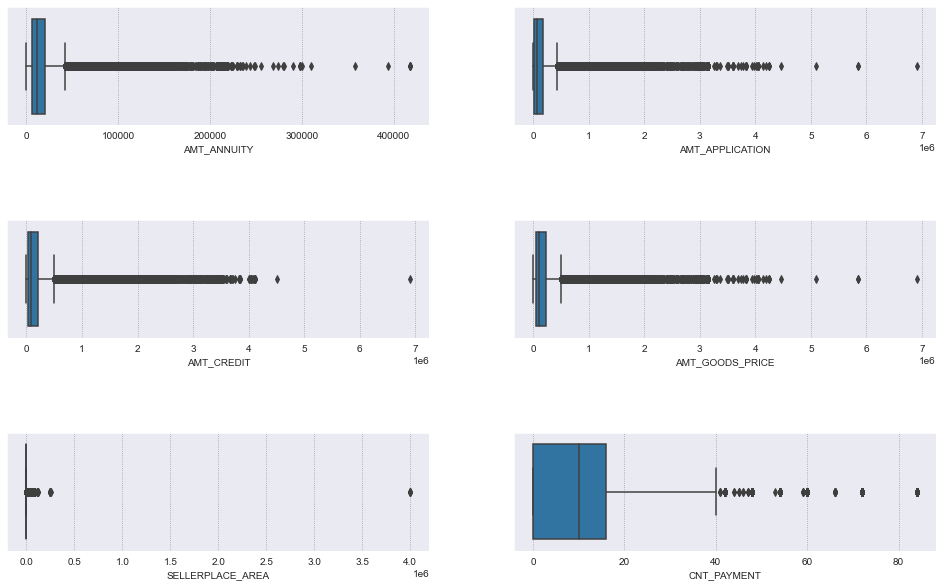

In [105]:
# Boxplot AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

f, axes = plt.subplots(3,2)
f.set_figheight(10)
f.set_figwidth(15)
sns.boxplot(x = 'AMT_ANNUITY', data = prev_app_df, ax = axes[0,0])
sns.boxplot(x = 'AMT_APPLICATION', data = prev_app_df, ax = axes[0,1])
sns.boxplot(x = 'AMT_CREDIT', data = prev_app_df, ax = axes[1,0])
sns.boxplot(x = 'AMT_GOODS_PRICE', data = prev_app_df, ax = axes[1,1])
sns.boxplot(x = 'SELLERPLACE_AREA', data = prev_app_df, ax = axes[2,0])
sns.boxplot(x = 'CNT_PAYMENT', data = prev_app_df, ax = axes[2,1])

f.subplots_adjust(left=0.04,hspace=0.8)

plt.show()

<div class="alert alert-block alert-success">
    
- `AMT_ANNUITY`, `AMT_APPLICATION`, `AMT_GOODS_PRICE` have considerable outliers.
    - Some clients might be able to repay loan in short amount of period so they have high annuity.
    - Amount of application is subjective and many might have asked for higher credit amount.
    - There might be some clients dealing with valuable and expensive items, services.
    
    
- `AMT_CREDIT` has few outliers.
    - While approving loan bank would have calculated the risk factors and arrived at some credit amount to be offered to client against his expected amount. In such case, there will be some lucky borrowers or else some businessmen with good rapport.
    
    
- `SELLERPLACE_AREA` has very few and some extreme ones.
    - May be big organizations.
    
    
- `CNT_PAYMENT` has some outliers.

Phew!!!!<br>
Done with most of the `"Data Cleaninig"`

***

## [3. Data Imbalance](#3.Data-imbalance)

Now, we'll evaluate the imbalance in the data acquired from applications we recieved.

In [106]:
curr_app_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [107]:
print('Clients not having repayment difficulties: {} %\nClients facing repayment difficulties: {} %'
      .format(round(curr_app_df.TARGET.value_counts()[0]/len(curr_app_df)*100, 2),
              round(curr_app_df.TARGET.value_counts()[1]/len(curr_app_df)*100, 2)))

repayers = round(curr_app_df.TARGET.value_counts()[0]/len(curr_app_df)*100, 2)
defaulters = round(curr_app_df.TARGET.value_counts()[1]/len(curr_app_df)*100, 2)
                 
print('Ratio of Imbalance (Repayers vs Defaulters):. {0:.2f}:1'.format(repayers/defaulters))

Clients not having repayment difficulties: 91.93 %
Clients facing repayment difficulties: 8.07 %
Ratio of Imbalance (Repayers vs Defaulters):. 11.39:1


Let's present this graphically.

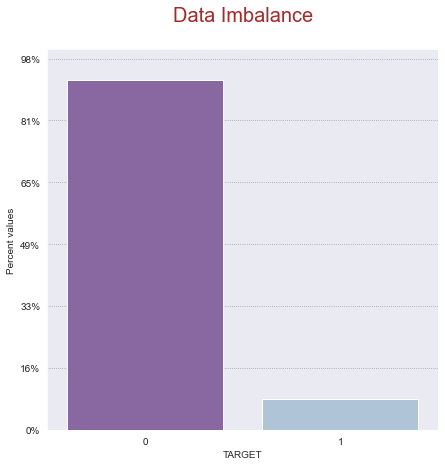

In [108]:
plt.figure(figsize=(7, 7))
ax = sns.countplot(x = 'TARGET', data = curr_app_df, palette='BuPu_r')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(curr_app_df)))
ax.set_ylim(0,len(curr_app_df))
ax.set_ylabel('Percent values')
plt.title('Data Imbalance\n', fontdict={'fontsize': '20', 'fontweight': '5', 'color': 'brown'})
plt.show()

- `TARGET` variable was the primary aspect via which we evaluated imbalance present in the data.<br>
 - It's evident from the calculations and graphs that Count/ Percentage of Clients without payment difficulties are far more high as compared to Defaulters.<br>
 - A simple inference from the ratio of imbalance is that for each Defaulter there are about 12 Repayers.
 
 
With univariate analysis we may acquire more insights on the imbalance taking different factors into account.

## [4. DATA ANALYSIS](#Univariate-analysis)

These are some functions for analysis.

In [109]:
def univariate_cat(data, defaulters_df, col, plot_size = (), x_rotate = False):
    '''
    Function for univariate plots
    Parameters:
    ----------
        defaulters_df : dataframe of clients having payment difficulties
        data : for internal refrence        
        col : list of 'variable_name' on which plots is based.
        plot_size : desired size of plot.
    Returns:
    -------
    Plot displaying the percentage of defaulters
    '''
    # calculating the count of defaulters in percentage
    df = pd.DataFrame((defaulters_df[col].
                   value_counts()/data[col].
                   value_counts())*100).reset_index().rename(columns = {
    'index':col, col:'TARGET'}).sort_values('TARGET', ascending=False)
    
    # Barplot for defaulters with y axis in percentage
    plt.figure(figsize=plot_size)
    sns.barplot(x= col,y='TARGET',data= df)
    
    
    plt.title('Defaulters in '+col + '\n', fontdict={'fontsize': '18', 'fontweight': '5', 'color': 'brown'})
    plt.ylabel('TARGET(%)', fontdict={'fontsize': '15', 'fontweight': '5', 'color': 'green'})
    plt.xlabel(col, fontdict={'fontsize': '15', 'fontweight': '5', 'color': 'green'})
    
    if x_rotate:
        plt.xticks(rotation=90)
    plt.show()

In [110]:
def segmented_univariate_plots(data,col, target,plot_size = (), log = False, percent_y=False, color = False,
                                   x_rotate = False):
    '''
    Function for univariate analysis.
    Parameters:
    ----------
        data1 : dataframe used for plotting
        col : 'variable_name' for plotting
        target : the 'variable_name' with respect ot which we want to segregate the plot.
        log : tranforming y axis in to logarithmic
                - This is done for easy interpretabilty when the ratio of categories is huge.
        percent_y : formats x-axis to percentage.
        color : color scheme for plot.
        x_rotate : rotate the x_axis labels to desired angle for easy reading.
    
    Returns:
    --------
        Count plot for the desired variable segment-wise.
        
    '''
    if plot_size:
        plt.figure(figsize = plot_size)
    else:
        plt.figure(figsize= (7,5))
    
    if color:
        ax = sns.countplot(x = col, data= data, hue = target, palette=color)
        ax.legend(title= target,loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        ax = sns.countplot(x = col, data= data, hue = target)
        ax.legend(title= target,loc='center left', bbox_to_anchor=(1, 0.5))
      
        if log:
            # setting y scale to log count
            ax.set_yscale('log')
            ax.set_ylabel('Log Count', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
            ax.set_xlabel(col, fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
            ax.xaxis.set_tick_params(labelsize=14)
            ax.yaxis.set_tick_params(labelsize=14)

        elif percent_y:
            # setting y scale to percentage
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(data[col])))
            ax.set_ylim(0,len(data[col]))      
            start, end = ax.get_ylim()
            ax.yaxis.set_ticks(np.arange(start, end, 20000))
            ax.set_ylabel('Percent values', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'}) 
            ax.set_xlabel(col, fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
            ax.xaxis.set_tick_params(labelsize=14)
            ax.yaxis.set_tick_params(labelsize=14)

        if x_rotate:
            ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) 
        plt.title('Distribution of ' + col + ' VS ' + target + '\n',  fontdict = {'fontsize': '18', 
                                                                        'fontweight': '5', 'color': 'brown'})
        plt.show()

***

### <span style="color:steelblue">Current Applications

For ease of analysis we need to divide the data into two distict sets namely: `Repayers` & `Defaulters`.<br>
We'll use it as needed.

In [111]:
# dividing the data into Repayers and Defaulters
repayers = curr_app_df[curr_app_df.TARGET == 0].drop(columns = 'TARGET').reset_index(drop=True)
defaulters = curr_app_df[curr_app_df.TARGET == 1].drop(columns = 'TARGET').reset_index(drop=True)

In [112]:
# Let's peek into the dataframes
repayers.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE_LAKHS,CREDIT_RANGE_LAKHS,GOODS_PRICE_RANGE_LAKHS,AGE_GROUP
0,100003,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,46,4,1186,291,Y,Y,N,Y,Y,N,Core staff,2,1,1,MONDAY,11,N,N,N,N,N,N,School,NaN,1,0,1,0,828,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,0,0,0,0,0,2-3,10+,10+,45-50
1,100004,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,53,1,4260,2531,Y,Y,Y,Y,Y,N,Laborers,1,2,2,MONDAY,9,N,N,N,N,N,N,Government,0.729567,0,0,0,0,815,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,0,0,0,0,0,0-1,1-2,1-2,50-55
2,100006,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,53,9,9833,2437,Y,Y,N,Y,N,N,Laborers,2,2,2,WEDNESDAY,17,N,N,N,N,N,N,Business Entity Type 3,NaN,2,0,2,0,617,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,0,0,0,0,0,1-2,3-4,2-3,50-55


In [113]:
defaulters.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE_LAKHS,CREDIT_RANGE_LAKHS,GOODS_PRICE_RANGE_LAKHS,AGE_GROUP
0,100002,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,3.51,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,2,3648,2120,Y,Y,N,Y,Y,N,Laborers,1,2,2,WEDNESDAY,10,N,N,N,N,N,N,Business Entity Type 3,0.139376,2,2,2,2,1134,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,0,0,0,0,1,2-3,4-5,3-4,25-30
1,100031,Cash loans,F,N,Y,0,1.125,9.799920,27076.5,7.02,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,52,8,6573,1827,Y,Y,N,Y,N,N,Cooking staff,1,3,2,MONDAY,9,N,N,N,N,N,N,Business Entity Type 3,0.190706,10,1,10,0,161,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,0,0,0,0,2,2,1-2,9-10,7-8,50-55
2,100047,Cash loans,M,N,Y,0,2.025,11.935800,35028.0,8.55,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,48,4,1182,1029,Y,Y,N,Y,N,N,Laborers,2,2,2,TUESDAY,9,N,N,N,N,N,N,Business Entity Type 3,0.320163,0,0,0,0,1075,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0,0,0,2,0,4,2-3,10+,8-9,45-50


#### <span style="color:darkgreen"> Univariate categorical variables

In [115]:
curr_app_df.select_dtypes(['object', 'category']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_D

The following categorical columns are selected for analysis:<br>
`NAME_CONTRACT_TYPE`, `CODE_GENDER`, `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`,
`NAME_TYPE_SUITE`, `NAME_INCOME_TYPE`, `NAME_EDUCATION_TYPE`,
`NAME_FAMILY_STATUS`, `NAME_HOUSING_TYPE`, `FLAG_MOBIL`,
`FLAG_EMP_PHONE`, `FLAG_WORK_PHONE`, `FLAG_CONT_MOBILE`, `FLAG_PHONE`,
`FLAG_EMAIL`, `OCCUPATION_TYPE`, `REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION`,
`LIVE_REGION_NOT_WORK_REGION`, `REG_CITY_NOT_LIVE_CITY`,
`REG_CITY_NOT_WORK_CITY`, `LIVE_CITY_NOT_WORK_CITY`,
`ORGANIZATION_TYPE`,
`AGE_GROUP`

We'll plot each variable with respect to target and also actual default rate.

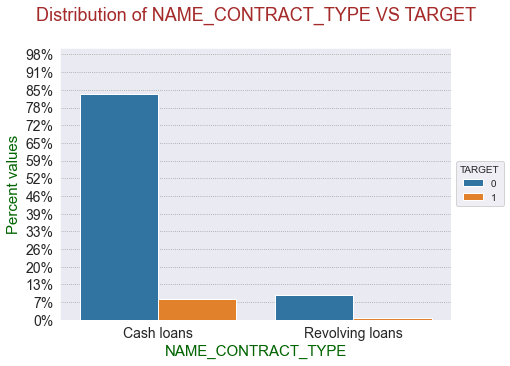

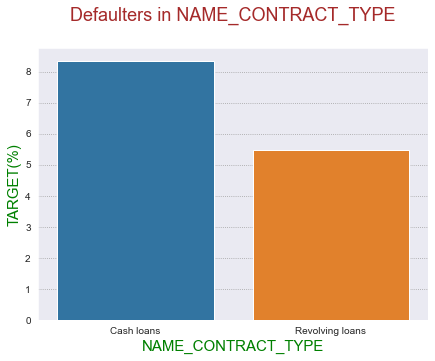

In [116]:
segmented_univariate_plots(curr_app_df, 'NAME_CONTRACT_TYPE', 'TARGET', percent_y=True)
univariate_cat(curr_app_df, defaulters, 'NAME_CONTRACT_TYPE', plot_size=(7,5))

**`Inference`**
- As compared to Cash loans percentage of revolving loans is very low.
- Cash loans has about 8-9% defaulters, whereas Revolving has 5-6%.

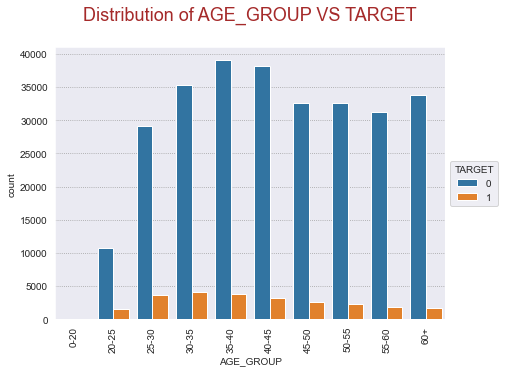

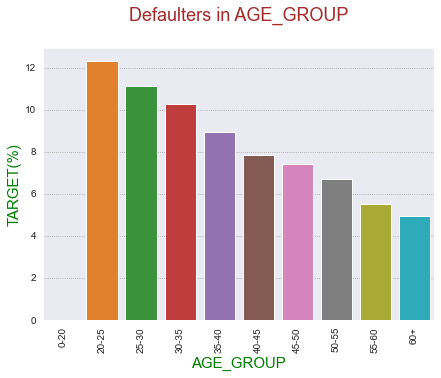

In [117]:
segmented_univariate_plots(curr_app_df, 'AGE_GROUP', 'TARGET',plot_size = (7,5), x_rotate=True)
univariate_cat(curr_app_df, defaulters, 'AGE_GROUP', plot_size=(7,5), x_rotate=True)

**`Inference`**
- Overall, considering age groups we find that most applicants are from age 30-45 and 60.
- Individual analysis of defaulters by age group tells us that 20-25 age group has highest percentage of defaulters which linearly descreases with groups and 60+ age group has the least percentage of defaulters.
- It's evident that there's risk in approving loan of applicants in age range of 20-30.

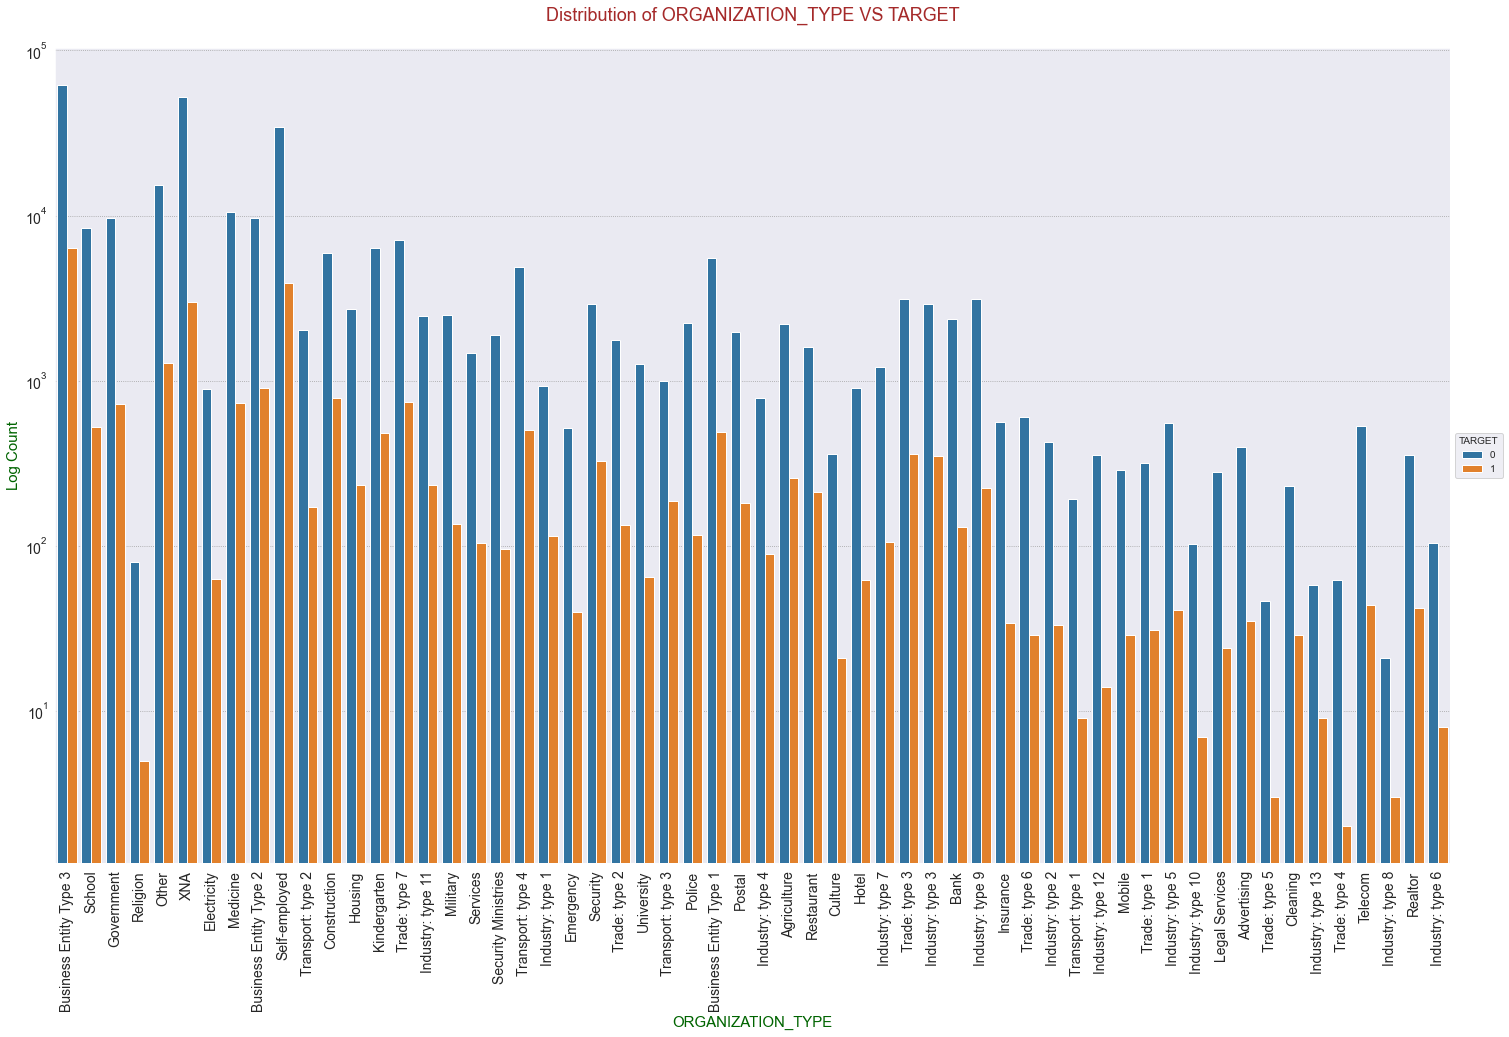

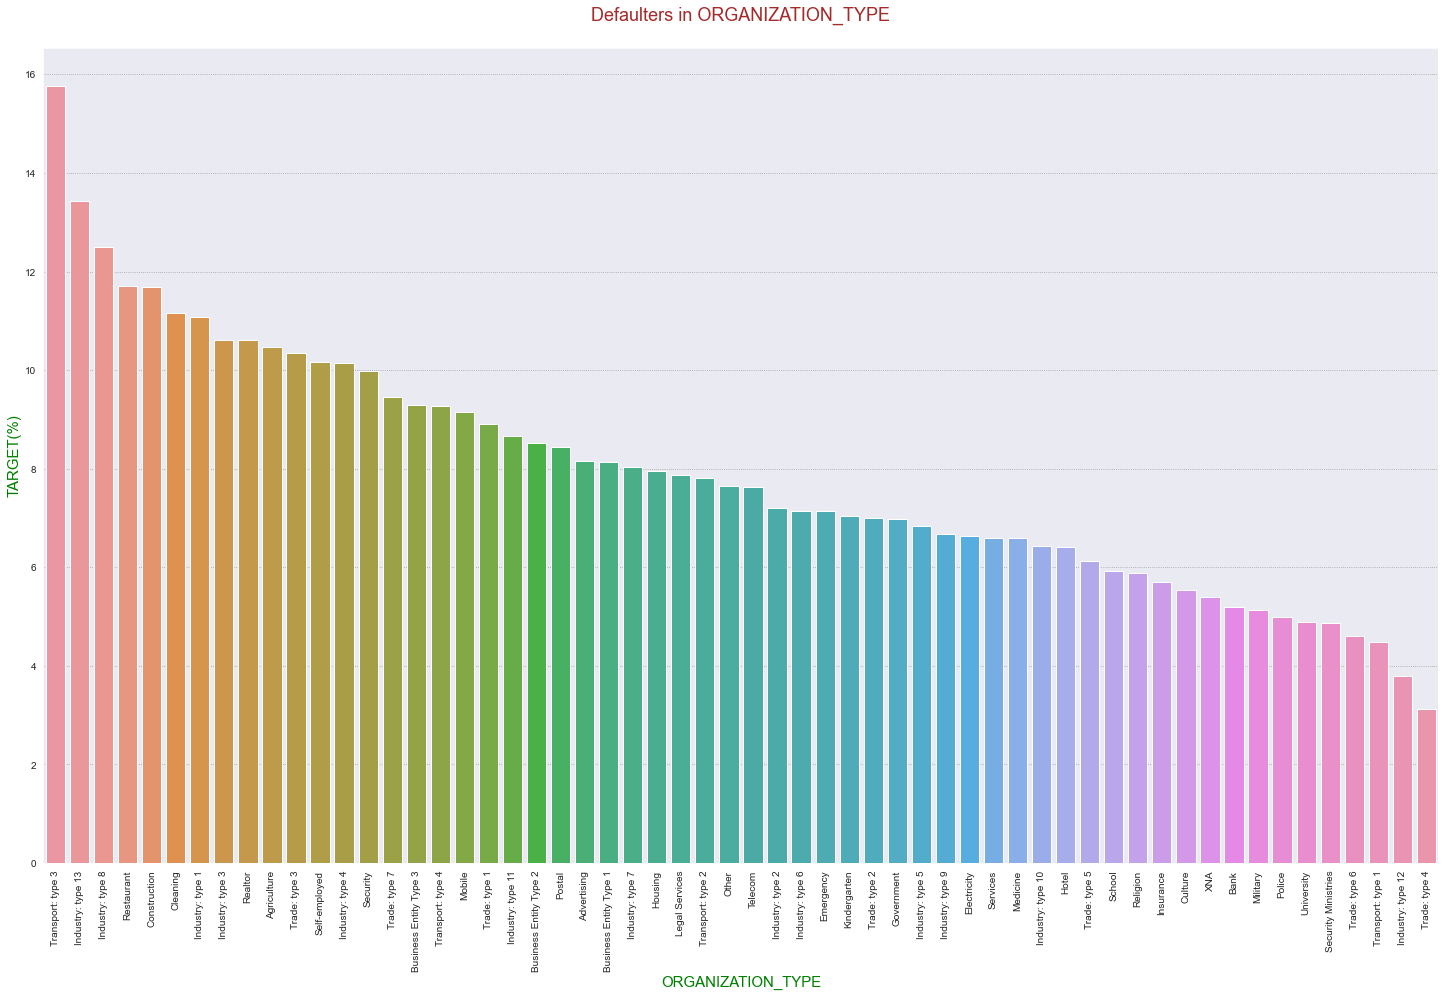

In [118]:
segmented_univariate_plots(curr_app_df, 'ORGANIZATION_TYPE', 'TARGET',
                           plot_size = (25,15), log=True, x_rotate=True)
univariate_cat(curr_app_df, defaulters, 'ORGANIZATION_TYPE', plot_size=(25,15), x_rotate=True)

**`Inference`**
- Business type 3, Self-employed show the most number of applications. In the middle of them lies the unknown Organization type XNA.
- A keen observation tells us that even though Transport type 3, industry type 8 and 13 has less count of applicants but their default rate lies in top 3.
- Transport type 1, Industry Type 12 and Trade Type 4 has least default rate which means it's less risk to offer/ approve their loans.
- Self employed category has relatively high applications as well as defaulters.

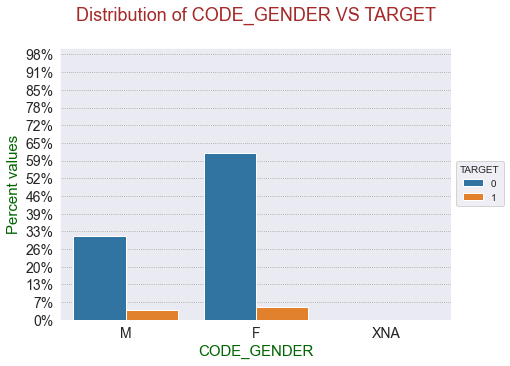

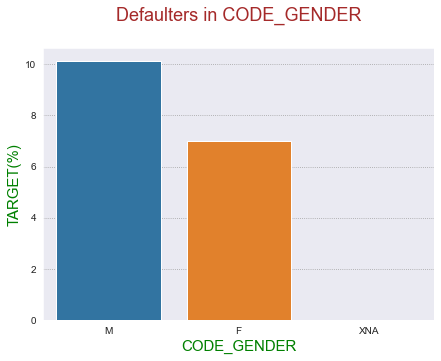

In [119]:
segmented_univariate_plots(curr_app_df, 'CODE_GENDER', 'TARGET', percent_y=True)
univariate_cat(curr_app_df, defaulters, 'CODE_GENDER', plot_size=(7,5))

**`Inference`**
- Female clients are 30% higher than male applicants.
- But the repayment situation is completely distinct, where male clients appear to cover about 10% defaulters from total defaulters data.

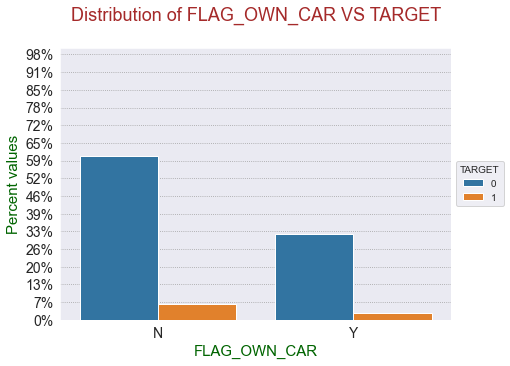

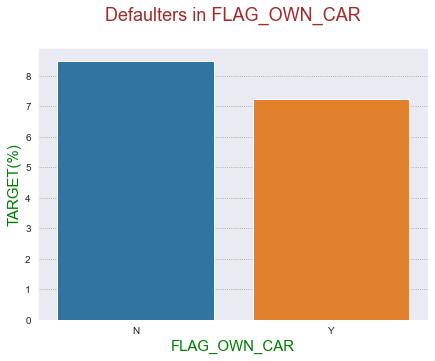

In [120]:
segmented_univariate_plots(curr_app_df, 'FLAG_OWN_CAR', 'TARGET', percent_y=True)
univariate_cat(curr_app_df, defaulters, 'FLAG_OWN_CAR', plot_size=(7,5))

**`Inference`**
- Clients who don't own car are double than those who own.
- But there is only 1% difference of defaulting between them. So, we can't predict exactly how this factor affects the business solution.

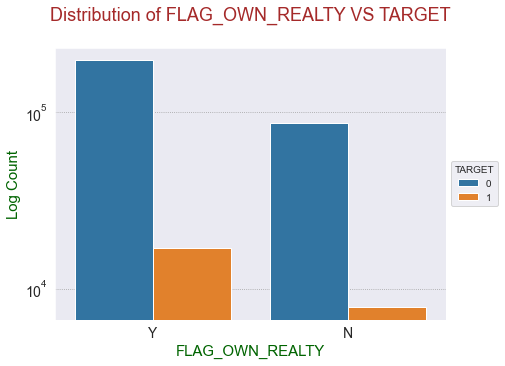

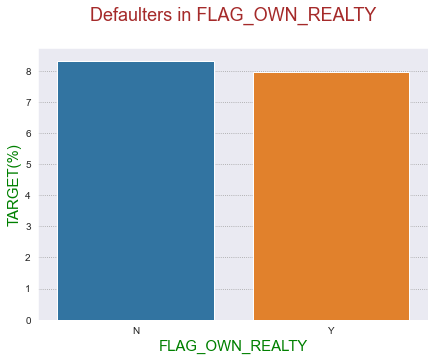

In [121]:
segmented_univariate_plots(curr_app_df, 'FLAG_OWN_REALTY', 'TARGET', log = True)
univariate_cat(curr_app_df, defaulters, 'FLAG_OWN_REALTY', plot_size=(7,5))

**`Inference`**
- Clients who don't own realty are double than those who own.
- But there is insgnificant variation in defaulting between them. So, again we can't 
predict exactly how this factor affects the business solution.

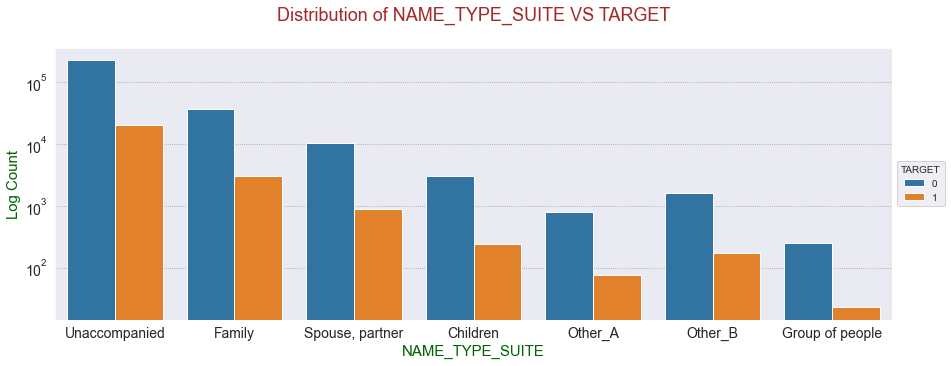

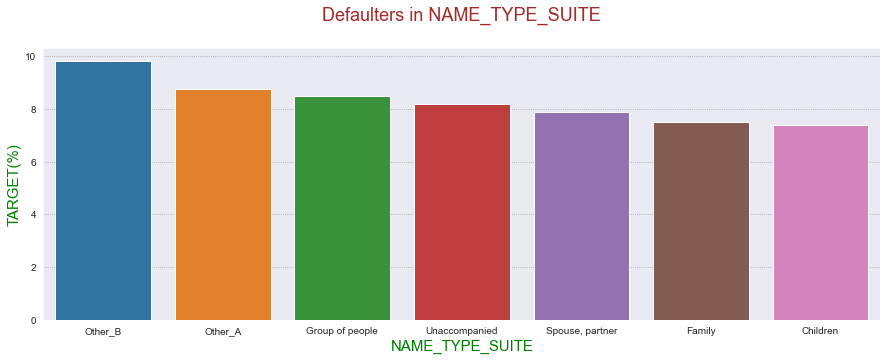

In [122]:
segmented_univariate_plots(curr_app_df, 'NAME_TYPE_SUITE', 'TARGET', plot_size=(15,5),  log = True)
univariate_cat(curr_app_df, defaulters, 'NAME_TYPE_SUITE', plot_size=(15,5))

**`Inference`**
- It's observed that most applicants were unaccompanied at the time of application. 
- The categories Other_B and Other_A has highest percentage of defaultees albiet their appplications are relatively less. Offering loan with high interest rate or reducing loan amount seems appropriate.

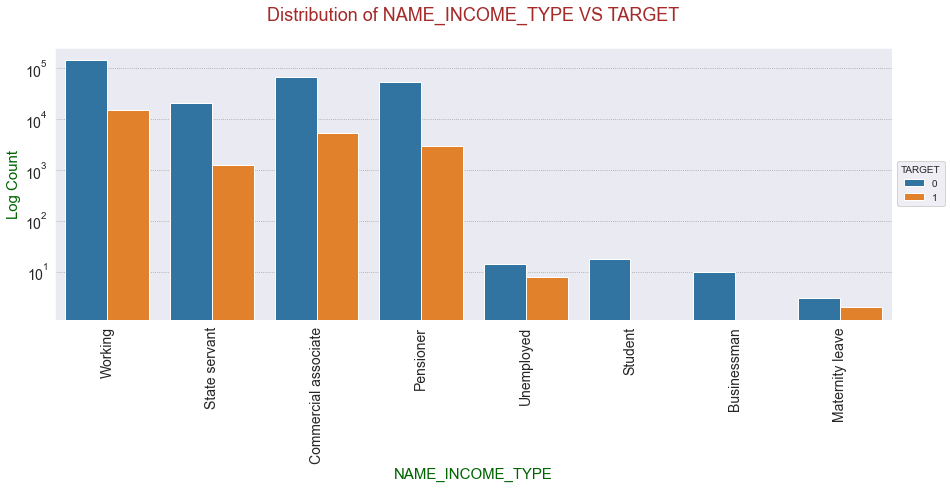

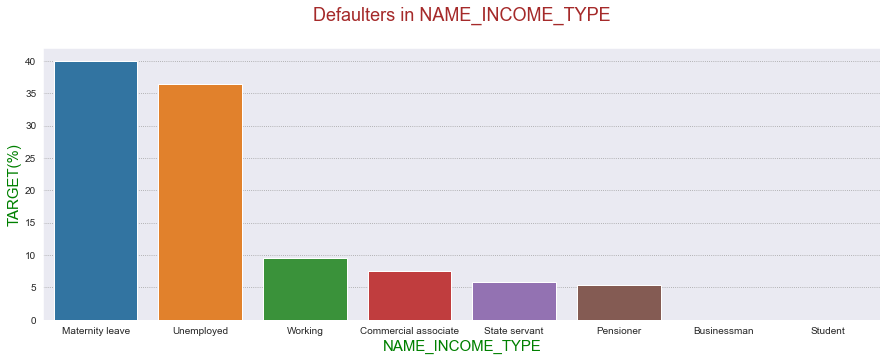

In [123]:
segmented_univariate_plots(curr_app_df, 'NAME_INCOME_TYPE', 'TARGET', plot_size=(15,5),  log = True, x_rotate=True)
univariate_cat(curr_app_df, defaulters, 'NAME_INCOME_TYPE', plot_size=(15,5), x_rotate=False)

**`Inference`**
- Working, commercial associate and pensioner applied the most for loan as well as they are less risky since their defaulting rate is below 10% of overall.
- Unemployed and maternity leave categories has very less clients but their defaulting rate is extremely high nearly 35-40%. It's better to deny their loans.
- There are no female applicants in Businessman and student fields. Moreover, along with their application count their default rate is least.

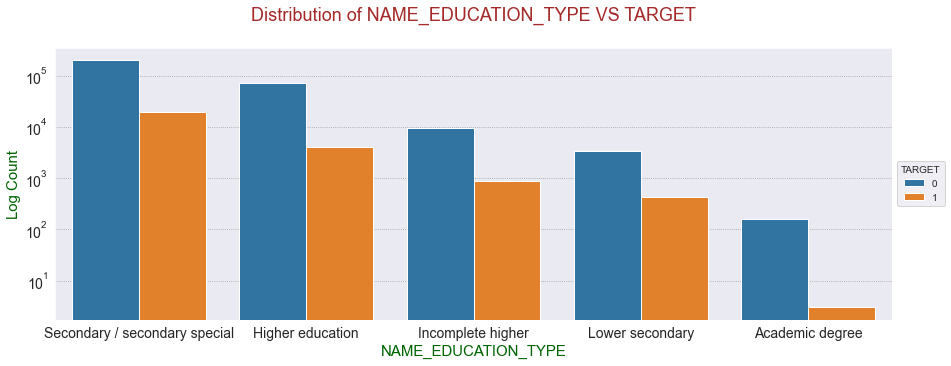

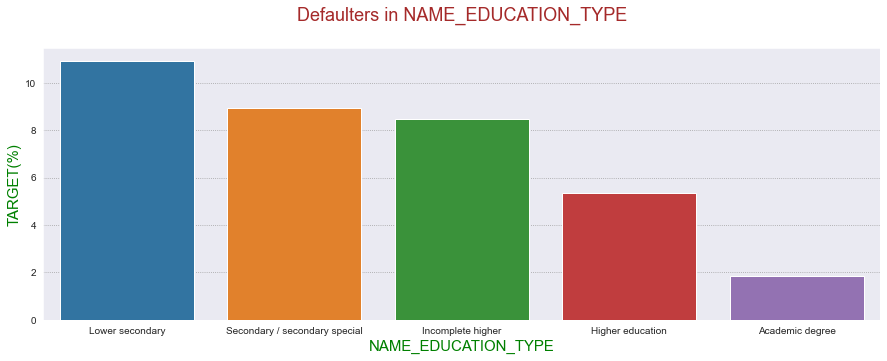

In [124]:
segmented_univariate_plots(curr_app_df, 'NAME_EDUCATION_TYPE', 'TARGET', plot_size=(15,5),  log = True)
univariate_cat(curr_app_df, defaulters, 'NAME_EDUCATION_TYPE', plot_size=(15,5))

**`Inference`**
- We see high number of applicants have completed their secondry and higher education. Applicants from rest education type are extremely less.
- Lower secondary education type clients are most likely to default.
- Academic degree education type clients are least likely to default.

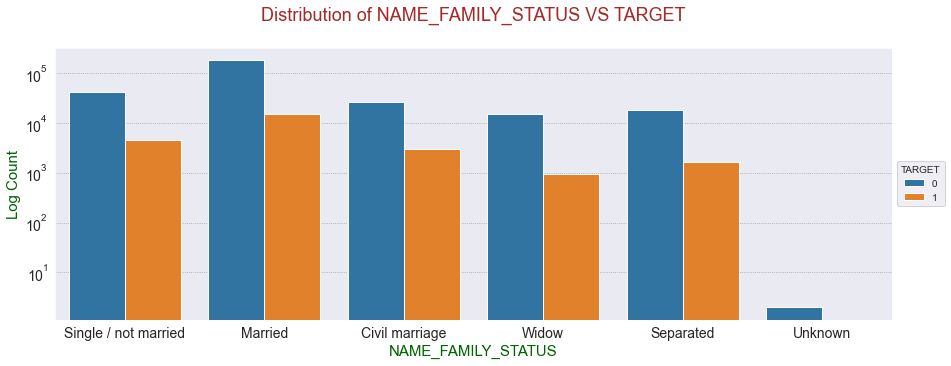

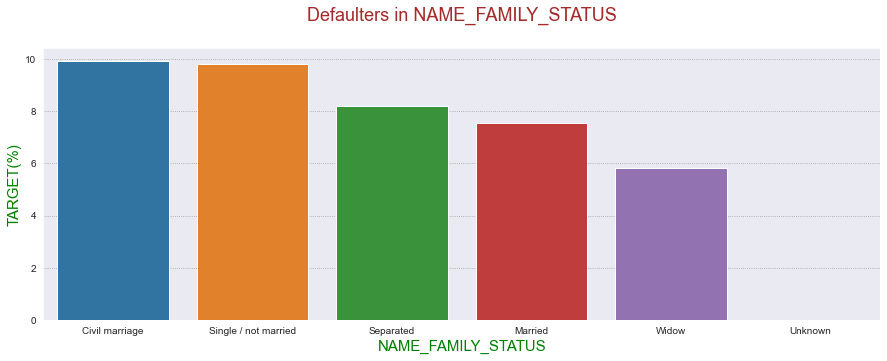

In [125]:
segmented_univariate_plots(curr_app_df, 'NAME_FAMILY_STATUS', 'TARGET', plot_size=(15,5),  log = True)
univariate_cat(curr_app_df, defaulters, 'NAME_FAMILY_STATUS', plot_size=(15,5))

**`Inference`**
- Majority of applications are married civilians.
- Applicants who are Civil married or Single/ Not married show highest defaulting rate.
- Those who family status was missing has least applications and surprisingly no default rate.

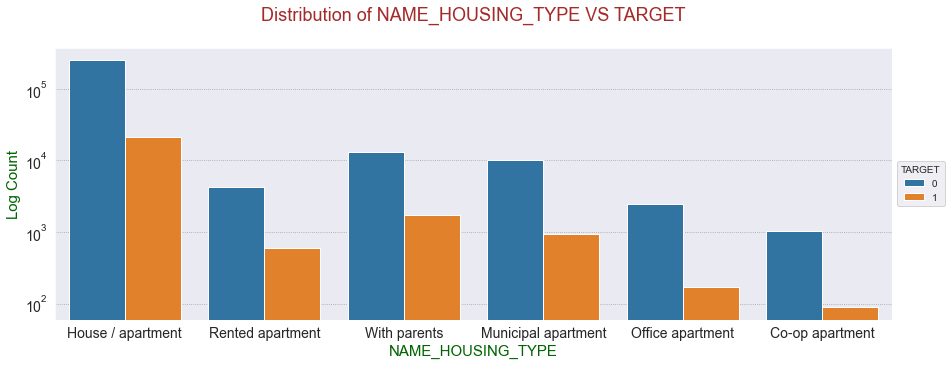

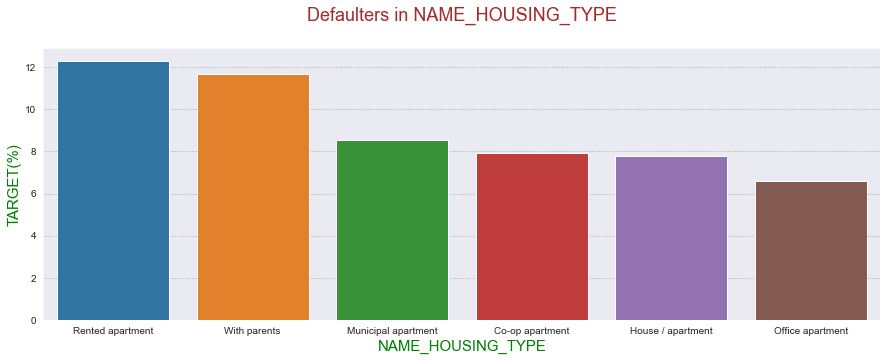

In [126]:
segmented_univariate_plots(curr_app_df, 'NAME_HOUSING_TYPE', 'TARGET', plot_size=(15,5),  log = True)
univariate_cat(curr_app_df, defaulters, 'NAME_HOUSING_TYPE', plot_size=(15,5))

**`Inference`**
- Majority of applicants stay in House or apartment housing type.
- Those applicants residing in office apartments are less likely to default.
- Those living in rented apartments and with parents have defaulting rate of ~12%.

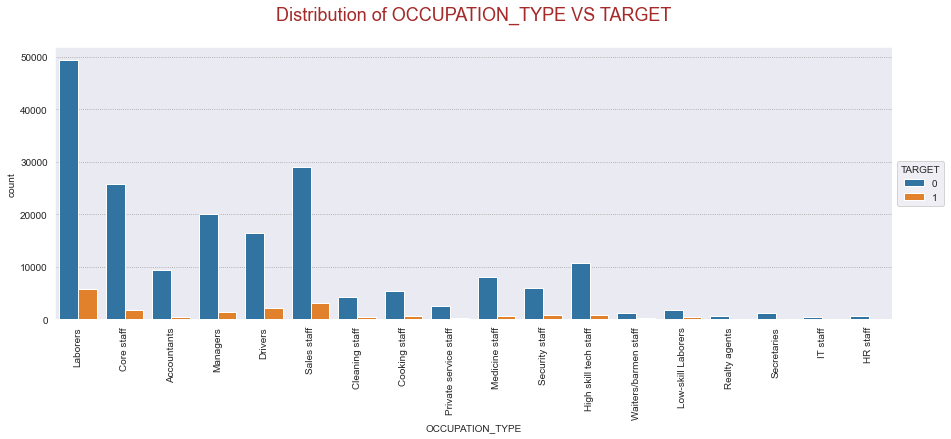

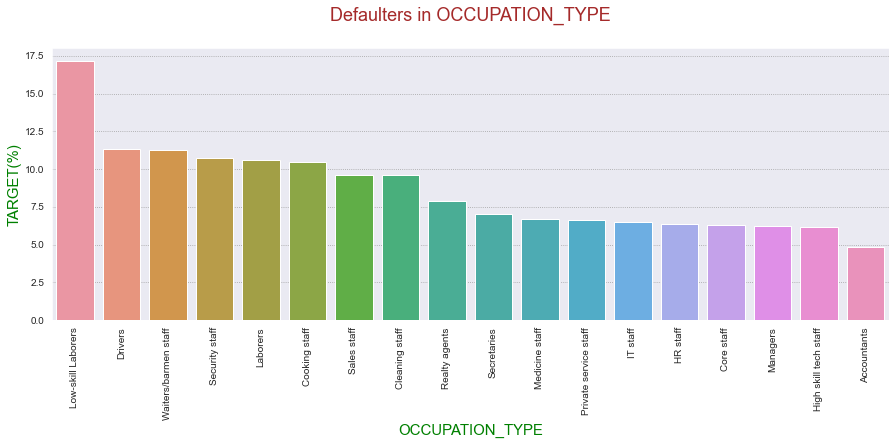

In [127]:
segmented_univariate_plots(curr_app_df, 'OCCUPATION_TYPE', 'TARGET', plot_size=(15,5), x_rotate=True)
univariate_cat(curr_app_df, defaulters, 'OCCUPATION_TYPE', plot_size=(15,5), x_rotate=True)

**`Inference`**
- Immediately the first observation is that Low-skill laborers has most likely defaulters ~17% but also their count is far less. Better to avoid them.
- We can see a trend that as the Occupation_type gets more formal and corporate the defaulting percentage reduces.
- Majority of applications has no occupation type. 
- Corporate employees show least count of appliactions.

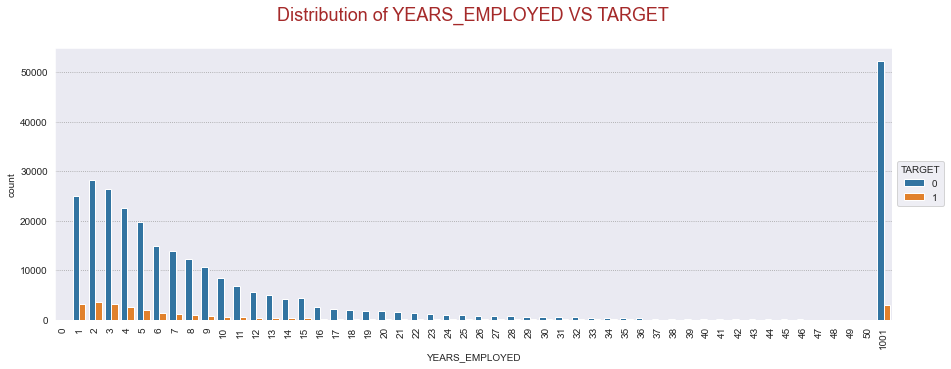

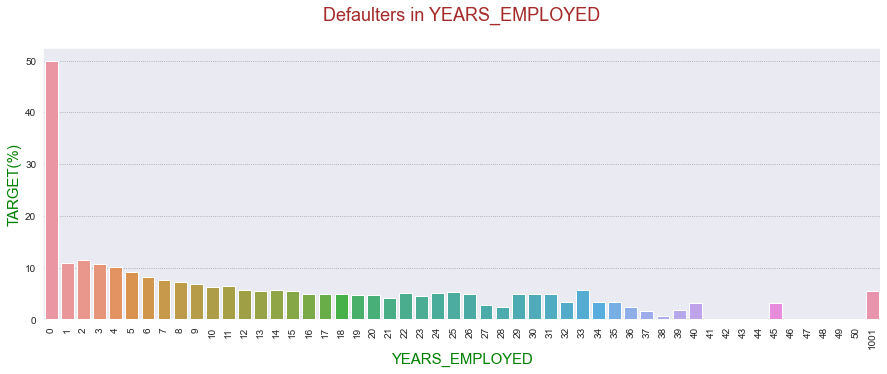

In [128]:
segmented_univariate_plots(curr_app_df, 'YEARS_EMPLOYED', 'TARGET', plot_size=(15,5), log = False, x_rotate=True)
univariate_cat(curr_app_df, defaulters, 'YEARS_EMPLOYED', plot_size=(15,5),x_rotate=True)

**`Inference`**
- Here we observe an obvious trend as the number of years of employment is increasing the count of application is decreasing exponentially.
- Those who are employed for less than 1 year has least number of applicants but their defaulting rate is extremely high ~50%.
- Members with 41+ years of employment are less likely to default about 1%.
- There was 1 ambiguous outlier for this variable which show majority of application count and defulter rate of about 5%.

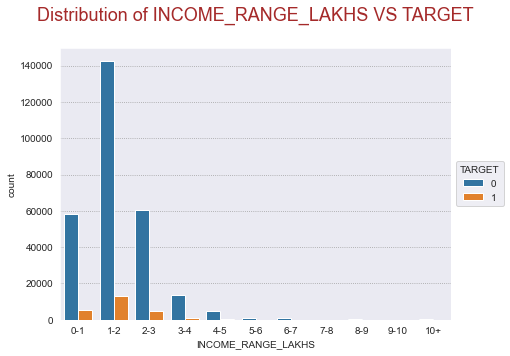

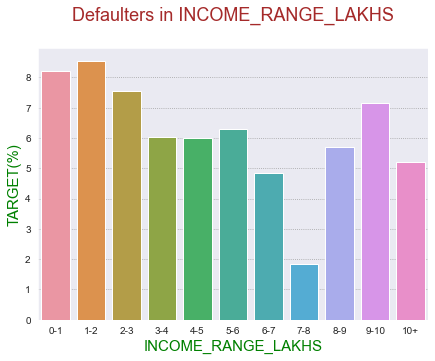

In [129]:
# INCOME_RANGE_LAKHS	CREDIT_RANGE_LAKHS	GOOD_PRICE_RANGE_LAKHS	
segmented_univariate_plots(curr_app_df, 'INCOME_RANGE_LAKHS', 'TARGET', plot_size=(7,5),  log = False)
univariate_cat(curr_app_df, defaulters, 'INCOME_RANGE_LAKHS', plot_size=(7,5))

**`Inference`**
- Applicants having Income range of 7-8% have about 2% probability of default.
- Most applications are from clients having income range upto 3 lakhs.

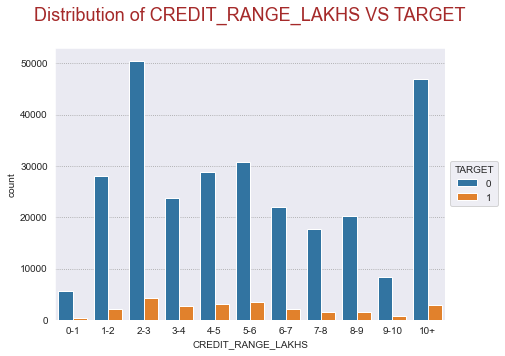

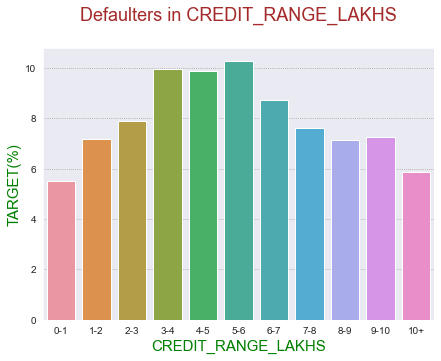

In [130]:
segmented_univariate_plots(curr_app_df, 'CREDIT_RANGE_LAKHS', 'TARGET', plot_size=(7,5),  log = False)
univariate_cat(curr_app_df, defaulters, 'CREDIT_RANGE_LAKHS', plot_size=(7,5))

**`Inference`**
- The client with credit ranges of 2-3 and 10+ lakhs has high count of applications.
- Clients having credit ranging from 3-6 lakhs have probability of defaulting about 10%.

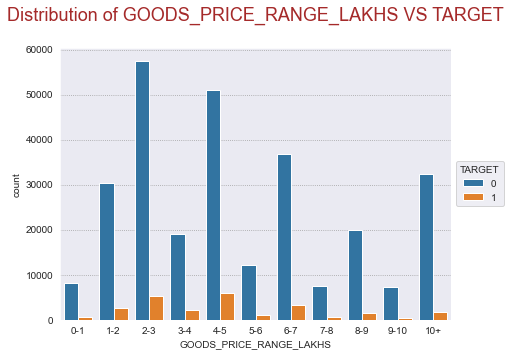

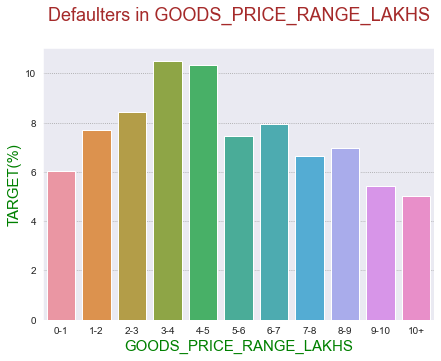

In [131]:
segmented_univariate_plots(curr_app_df, 'GOODS_PRICE_RANGE_LAKHS', 'TARGET', plot_size=(7,5),  log = False)
univariate_cat(curr_app_df, defaulters, 'GOODS_PRICE_RANGE_LAKHS', plot_size=(7,5))

**`Inference`**
- The goods value ranges of 2-3, 4-5 and 10+ lakhs have higher count of applications.
- Clients with goods price range of 3-5 lakhs are most likely to default.

***

#### <span style="color:darkgreen"> Bivariate categorical variables

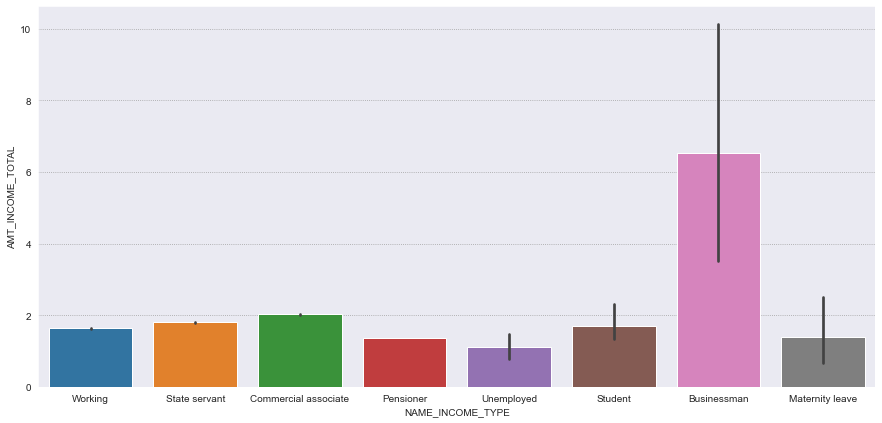

In [132]:
# Barplot of NAME_INCOME_TYPE vs AMT_INCOME_TOTAL
plt.figure(figsize=(15,7))
sns.barplot(x = 'NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL', data = curr_app_df)
plt.show()

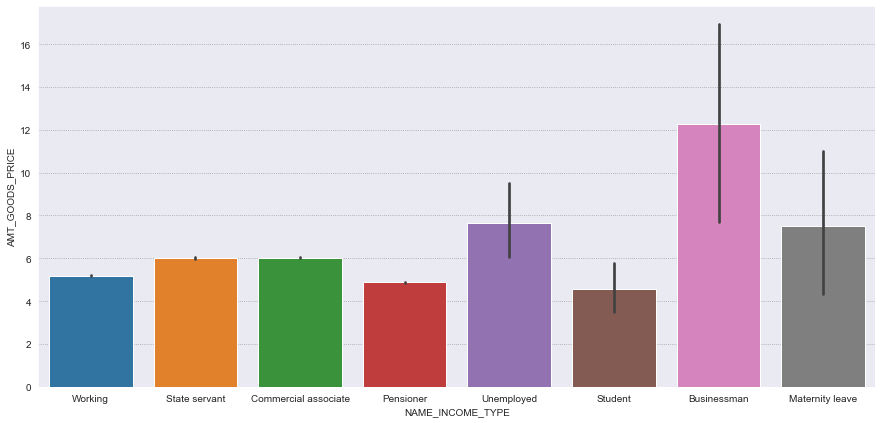

In [133]:
# Barplot of NAME_INCOME_TYPE vs AMT_GOODS_PRICE
plt.figure(figsize=(15,7))
sns.barplot(x = 'NAME_INCOME_TYPE', y= 'AMT_GOODS_PRICE', data = curr_app_df)
plt.show()

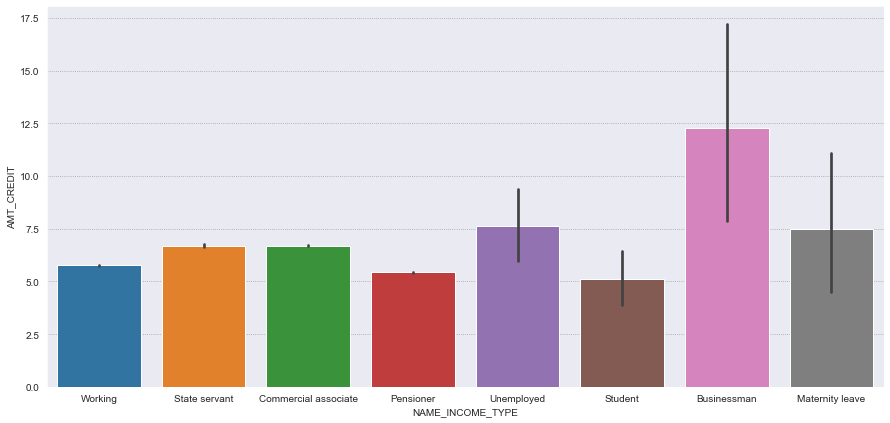

In [134]:
# Barplot of NAME_INCOME_TYPE vs AMT_CREDIT
plt.figure(figsize=(15,7))
sns.barplot(x = 'NAME_INCOME_TYPE', y= 'AMT_CREDIT', data = curr_app_df)
plt.show()

**`Inference`**
- Business persons income and values of goods is high which automatically leads the bank to provide them with high credit.
- We see that, the income of unemployed clients even though being lowest, the aggregated goods price is second highest as well as the credit amount.

#### <span style="color:darkgreen"> Univariate/ Bivariate Numerical variables

In [135]:
curr_app_df.select_dtypes(['int64', 'float64']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'AGE', 'YEARS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

We are considering the following variables:
`AMT_INCOME_TOTAL`, `AMT_CREDIT`, `AMT_ANNUITY`, `AMT_GOODS_PRICE`

We'll plot a pairplot which will define the univariate as well as bivariate plots, cutting down the hassle for separate univariate and bivariate plots.

In [136]:
# creating new data frame of just the numerical variables
num_curr_app_df = curr_app_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']]

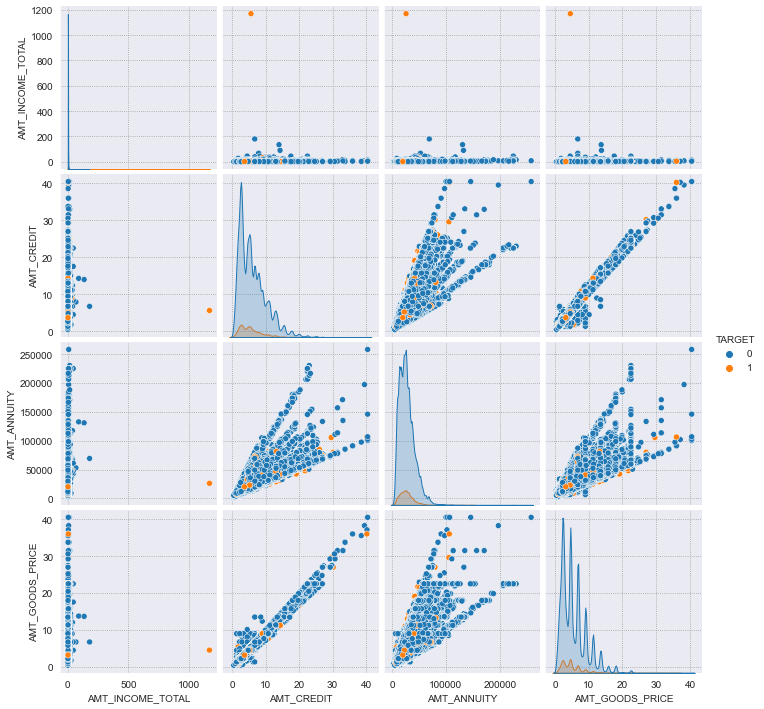

In [137]:
sns.pairplot(data=num_curr_app_df, hue="TARGET", corner=False)
plt.show()

**`Inference`**
- The credit amount for majority of applications is more or less up to 10 lakhs.
- The repayment amount for most of the clients falls below 1 lakh and after that the graph settles which tells that very few clients will be having annuity above 1 lakh.
- The applications count with respect to the goods values sees a gradual drop with many peaks. Most applicants price of goods fall within 10 lakhs and again within that there are distinct peaks around which the values are lying. After 10 lakhs the applicants count decreases as the price of goods increases.
- Amount credit increases linearly with amount goods price and us suggests that they exhibit strong correlation between them.

***

## [6. Top Correlations](#correlations)

We'll conclude with only the reliable variables which will provide justified insights.

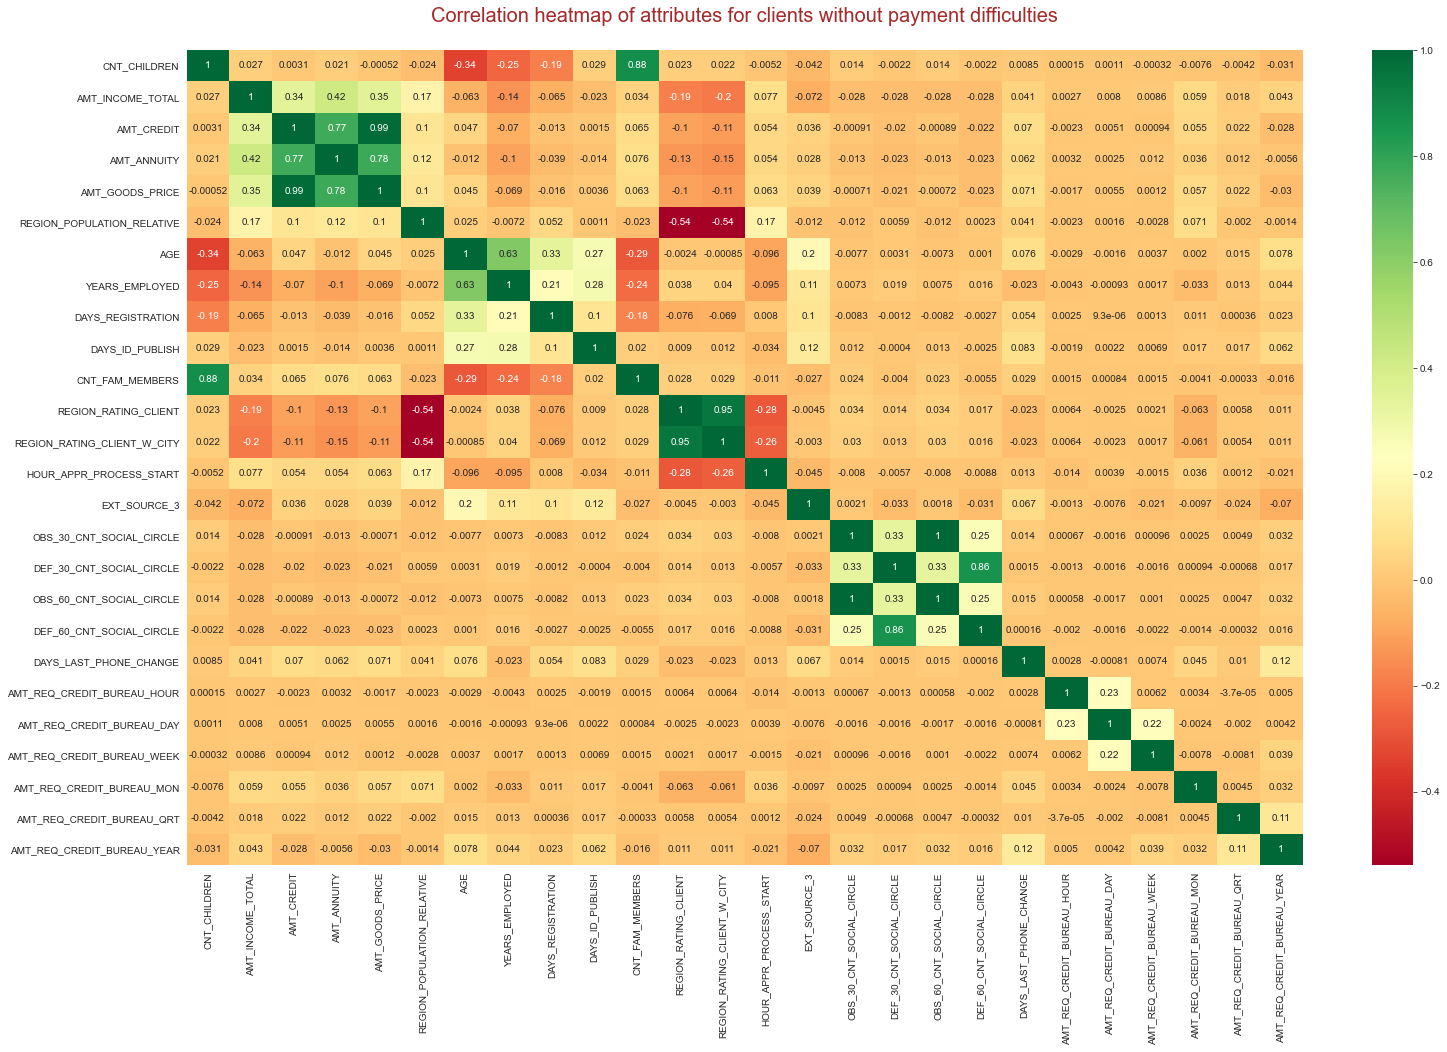

In [138]:
# Plotting Correlation heatmap of attributes for clients without payment difficulties
plt.figure(figsize=(25,15))
sns.heatmap(repayers.iloc[:,1:].corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation heatmap of attributes for clients without payment difficulties\n',  fontdict = {'fontsize': '20', 
                                                                        'fontweight': '5', 'color': 'brown'})
plt.show()

In [139]:
# Filtering the top 10 values
repayers.iloc[:,1:].corr().unstack().sort_values(ascending=False).drop_duplicates()[1:20]

OBS_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE       0.998508
AMT_GOODS_PRICE            AMT_CREDIT                     0.987250
REGION_RATING_CLIENT       REGION_RATING_CLIENT_W_CITY    0.950149
CNT_FAM_MEMBERS            CNT_CHILDREN                   0.878571
DEF_60_CNT_SOCIAL_CIRCLE   DEF_30_CNT_SOCIAL_CIRCLE       0.859332
AMT_ANNUITY                AMT_GOODS_PRICE                0.776686
                           AMT_CREDIT                     0.771309
YEARS_EMPLOYED             AGE                            0.626037
AMT_INCOME_TOTAL           AMT_ANNUITY                    0.418953
AMT_GOODS_PRICE            AMT_INCOME_TOTAL               0.349462
AMT_CREDIT                 AMT_INCOME_TOTAL               0.342799
DAYS_REGISTRATION          AGE                            0.333020
DEF_30_CNT_SOCIAL_CIRCLE   OBS_60_CNT_SOCIAL_CIRCLE       0.331336
OBS_30_CNT_SOCIAL_CIRCLE   DEF_30_CNT_SOCIAL_CIRCLE       0.329206
DAYS_ID_PUBLISH            YEARS_EMPLOYED                 0.27

<div class="alert alert-block alert-success">

Top 10 correlations of Repayers without payment difficulties :<br>
1. `AMT_GOODS_PRICE` - `AMT_CREDIT`
2. `CNT_FAM_MEMBERS` - `CNT_CHILDREN`
3. `AMT_ANNUITY `- `AMT_GOODS_PRICE`
4. `AMT_ANNUITY` - `AMT_CREDIT`
5. `YEARS_EMPLOYED` - `AGE`
6. `AMT_INCOME_TOTAL` - `AMT_ANNUITY`
7. `AMT_GOODS_PRICE` - `AMT_INCOME_TOTAL`
8. `AMT_CREDIT` - `AMT_INCOME_TOTAL`
9. `DAYS_REGISTRATION` - `AGE`
10.` DAYS_ID_PUBLISH` - `YEARS_EMPLOYED`

***

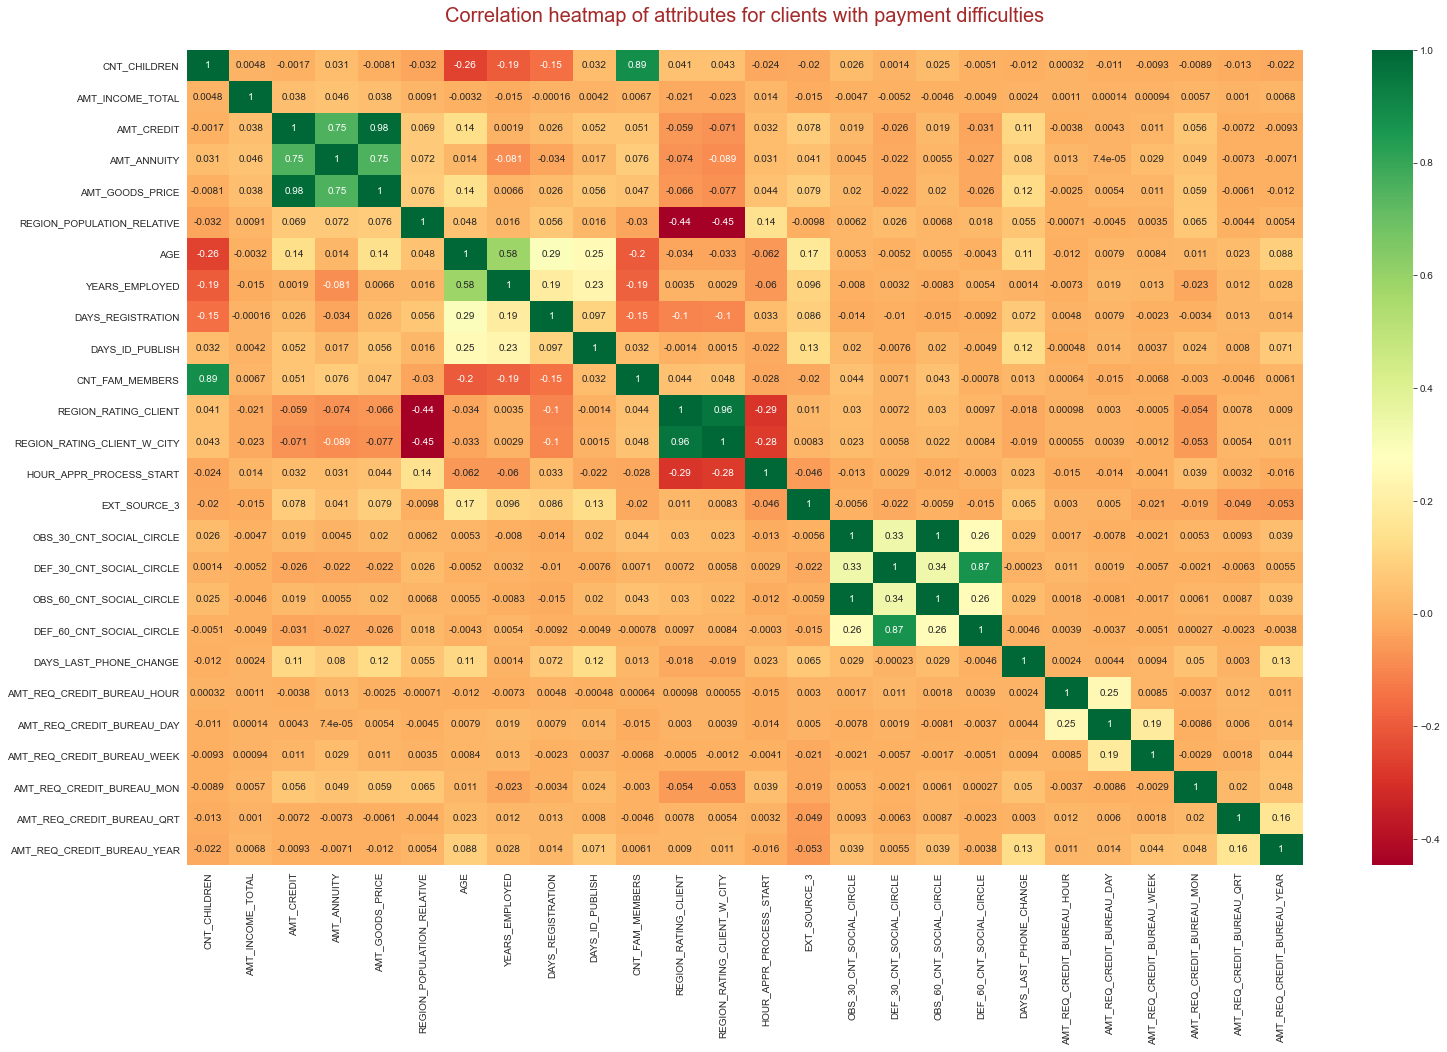

In [180]:
# Plotting Correlation heatmap of attributes for clients with payment difficulties
plt.figure(figsize=(25,15))
sns.heatmap(defaulters.iloc[:,1:].corr(), annot=True, cmap = 'RdYlGn')
plt.title('Correlation heatmap of attributes for clients with payment difficulties\n',  fontdict = {'fontsize': '20', 
                                                                        'fontweight': '5', 'color': 'brown'})
plt.show()

In [141]:
# Filtering the top 10 values
defaulters.iloc[:,1:].corr().unstack().sort_values(ascending=False).drop_duplicates()[1:20]

OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE       0.998269
AMT_GOODS_PRICE             AMT_CREDIT                     0.983103
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                CNT_FAM_MEMBERS                0.885484
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.868994
AMT_ANNUITY                 AMT_GOODS_PRICE                0.752699
                            AMT_CREDIT                     0.752195
YEARS_EMPLOYED              AGE                            0.582443
DEF_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.337181
OBS_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.333825
AGE                         DAYS_REGISTRATION              0.289077
DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.264159
OBS_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.261009
DAYS_ID_PUBLISH             AGE                            0.252265
AMT_REQ_CREDIT_BUREAU_DAY   AMT_REQ_CREDIT_BUREA

<div class="alert alert-block alert-success">

Top 10 correlations of Repayers with payment difficulties :<br>
1. `AMT_GOODS_PRICE` - `AMT_CREDIT`
2. `CNT_FAM_MEMBERS` - `CNT_CHILDREN`
3. `AMT_ANNUITY` - `AMT_GOODS_PRICE`
4. `AMT_ANNUITY` - `AMT_CREDIT`
5. `YEARS_EMPLOYED` - `AGE`
6. `AGE` -  `DAYS_REGISTRATION`
7. `DAYS_ID_PUBLISH` - `AGE`
8. `YEARS_EMPLOYED` - `DAYS_ID_PUBLISH`
9. `DAYS_REGISTRATION` - `YEARS_EMPLOYED`
10. `EXT_SOURCE_3` - `AGE`

***

### <span style="color:steelblue">Previous Applications

For further analysis, we need to merge the two dataframes of current and previous applications.<br>
Recall we had already performed the cleaning steps.

In [142]:
#Merging dataframes
merged_df = pd.merge(prev_app_df, curr_app_df, how = 'inner', on = 'SK_ID_CURR')

In [143]:
print('Shape of merged dataframe: {}'.format(merged_df.shape))

Shape of merged dataframe: (1413701, 104)


***

Analysing the `NAME_CONTRACT_TYPE_x` with `NAME_CONTRACT_STATUS`

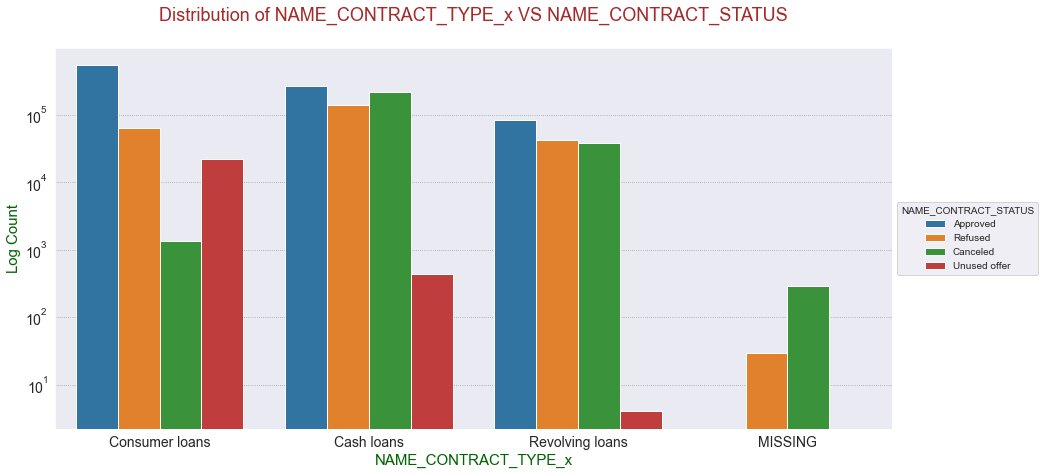

In [161]:
segmented_univariate_plots(merged_df, 'NAME_CONTRACT_TYPE_x', 'NAME_CONTRACT_STATUS', plot_size=(15,7),
                           log=True, percent_y=False, color=False, x_rotate=False)

**`Inference`**
- The highest count of loans approved were consumer type.
- Cash loans have more rejections and cancellations compared to other loans.

***

Analysing the `NAME_CONTRACT_TYPE_x` with `TARGET`

In [165]:
merged_df.groupby(by = ['NAME_CONTRACT_TYPE_x'])['TARGET'].value_counts(normalize=True)*100

NAME_CONTRACT_TYPE_x  TARGET
Cash loans            0         90.874237
                      1          9.125763
Consumer loans        0         92.290038
                      1          7.709962
MISSING               0         79.872204
                      1         20.127796
Revolving loans       0         89.531382
                      1         10.468618
Name: TARGET, dtype: float64

**`Inference`**
- Consumer and cash loans have highest repayment percentage ~92%. These are potential customers for bank.

***

Analysing the `NAME_CONTRACT_TYPE_x` with `NAME_CONTRACT_TYPE_x`

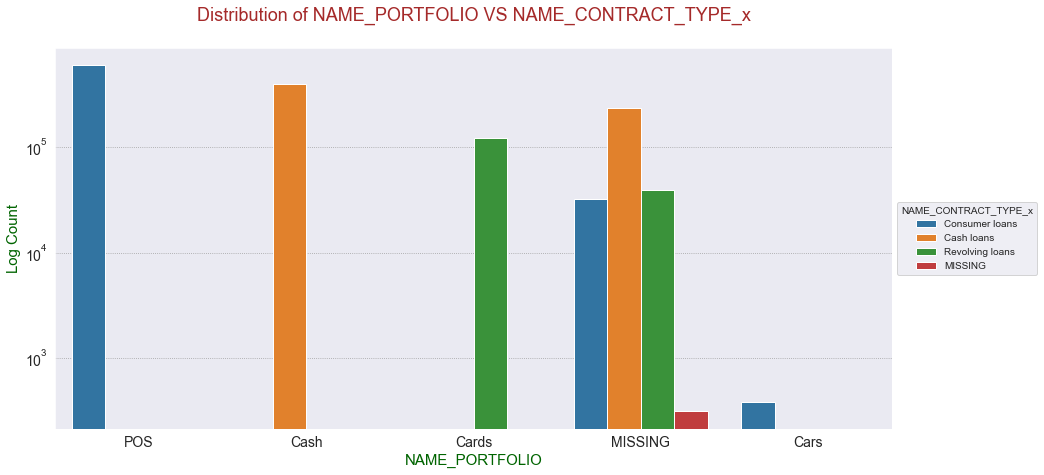

In [162]:
segmented_univariate_plots(merged_df, 'NAME_PORTFOLIO', 'NAME_CONTRACT_TYPE_x', plot_size=(15,7),
                           log=True, percent_y=False, color=False, x_rotate=False)

In [166]:
merged_df.groupby(by = ['NAME_CONTRACT_TYPE_x'])['NAME_PORTFOLIO'].value_counts(normalize=True)*100

NAME_CONTRACT_TYPE_x  NAME_PORTFOLIO
Cash loans            Cash               62.489709
                      MISSING            37.510291
Consumer loans        POS                94.754788
                      MISSING             5.184436
                      Cars                0.060775
MISSING               MISSING           100.000000
Revolving loans       Cards              75.594294
                      MISSING            24.405706
Name: NAME_PORTFOLIO, dtype: float64

**`Inference`**
- Majority of consumer loans were at point of sales about 94%, followed by revolving loans for cards ~75%.

***

Analysing the `Cash Loan Purpose` with `Contract Status` and `Repayment`.

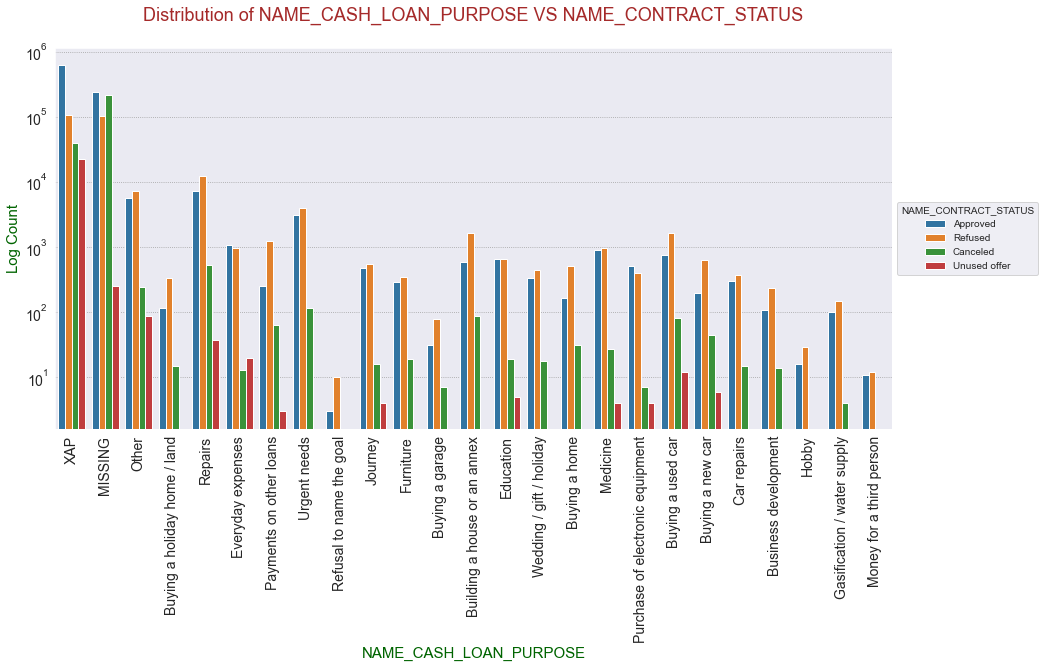

In [144]:
segmented_univariate_plots(merged_df, col = 'NAME_CASH_LOAN_PURPOSE', target='NAME_CONTRACT_STATUS', 
                               plot_size=(15,7), log=True, x_rotate=True)

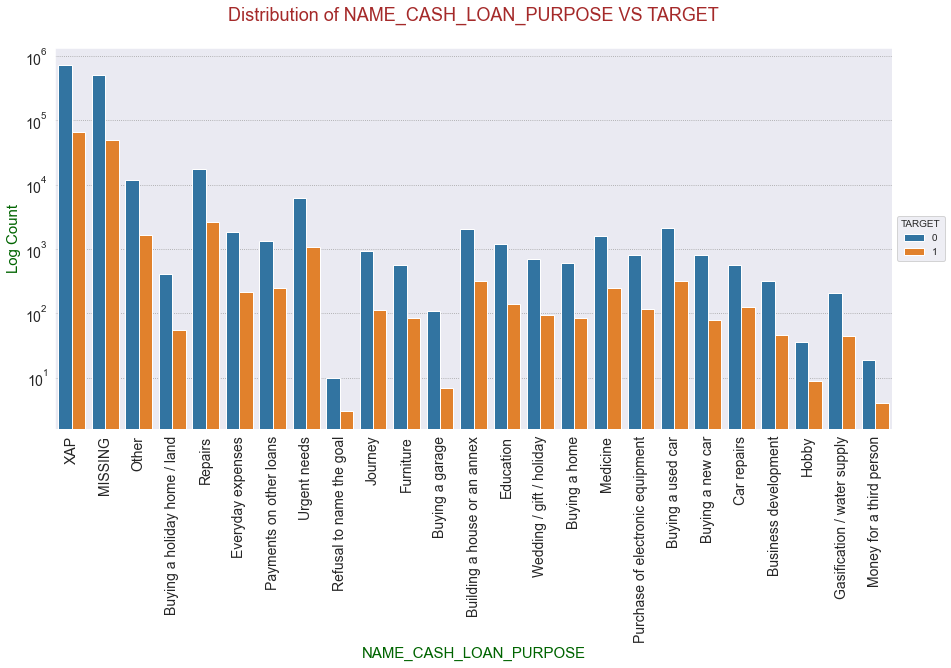

In [145]:
segmented_univariate_plots(merged_df, col = 'NAME_CASH_LOAN_PURPOSE', target='TARGET', 
                               plot_size=(15,7), log=True, x_rotate=True)

**`Inference`**
- High count of applications has either XAP ( Not applicable ) or MISSING ( Not available ) values in the field of loan purpose. But here we can't infer to lack of information about these values.
- Thereafter, `Repairs` has the third highest rejection count followed by `Others`.
- Again, `Repairs` and `Others` are most likely defaulters.
- The fields having XAP and MISSING surprisingly has better approval as well as repayers count. Here we need more investigation.

***

Analysing the `Client type` with `Contract Status` and `Repayment`.

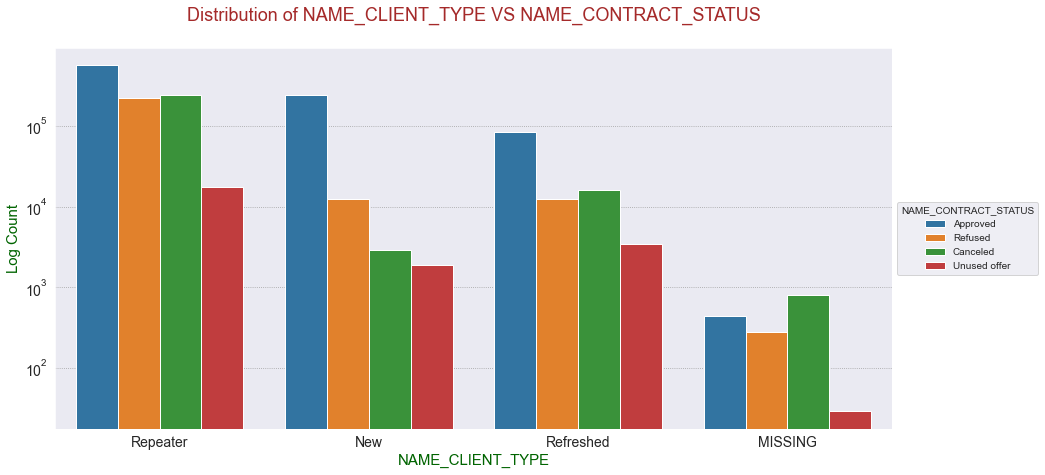

In [177]:
segmented_univariate_plots(merged_df, col = 'NAME_CLIENT_TYPE', target='NAME_CONTRACT_STATUS', 
                               plot_size=(15,7), log=True)

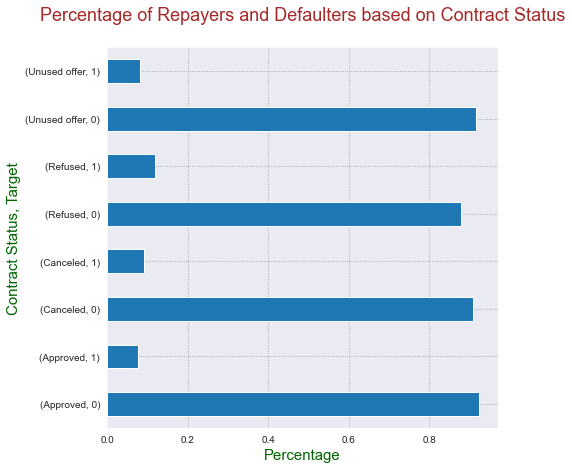

In [147]:
plt.figure(figsize=(7,7))
merged_df.groupby(by = ['NAME_CONTRACT_STATUS'])['TARGET'].value_counts(normalize = True).plot(kind = 'barh')
plt.title('Percentage of Repayers and Defaulters based on Contract Status\n',  fontdict = {'fontsize': '18', 
                                                                        'fontweight': '5', 'color': 'brown'})
plt.xlabel('Percentage', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
plt.ylabel('Contract Status, Target', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
plt.show()

In [148]:
merged_df.groupby(by = ['NAME_CONTRACT_STATUS'])['TARGET'].value_counts(normalize=True)*100

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.411345
                      1          7.588655
Canceled              0         90.826431
                      1          9.173569
Refused               0         88.003586
                      1         11.996414
Unused offer          0         91.748276
                      1          8.251724
Name: TARGET, dtype: float64

**`Inference`**
- About 92% clients whose loans were approved previously repayed in current case.
- About 88% clients whose loans were refused previously repayed in current case.

***

Analysing the `Portfolio` with `Contract Status` .

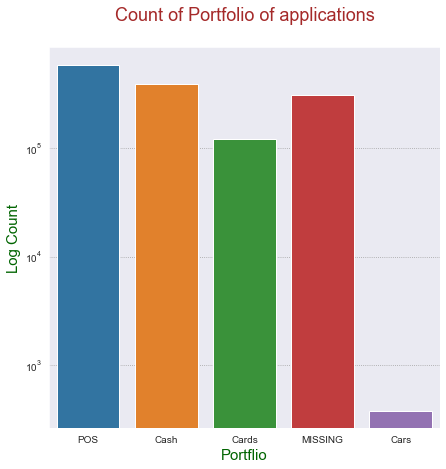

In [149]:
plt.figure(figsize=(7, 7))
sns.countplot(x = 'NAME_PORTFOLIO', data = merged_df)
plt.title('Count of Portfolio of applications\n',  fontdict = {'fontsize': '18', 
                                                                        'fontweight': '5', 'color': 'brown'})
plt.xlabel('Portflio', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
plt.ylabel('Log Count', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
plt.yscale('log')
plt.show()

In [150]:
# plt.figure(figsize=(7,7))
merged_df.groupby(by = 'NAME_PORTFOLIO')['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100
# plt.xscale('log')

NAME_PORTFOLIO  NAME_CONTRACT_STATUS
Cards           Approved                67.555847
                Refused                 32.101488
                Canceled                 0.341845
                Unused offer             0.000820
Cars            Approved                63.421053
                Refused                 27.894737
                Canceled                 8.684211
Cash            Approved                68.012041
                Refused                 29.898663
                Canceled                 2.089296
MISSING         Canceled                81.598435
                Refused                 11.243339
                Unused offer             7.157249
                Approved                 0.000977
POS             Approved                90.650677
                Refused                  9.195895
                Unused offer             0.131992
                Canceled                 0.021436
Name: NAME_CONTRACT_STATUS, dtype: float64

**`Inference`**
- `POS` loans had the highest count of applications.
- Previously about 90% applications in `POS` were approved.
- Most rejected loans of previous applicants were for cards(~32%).

***

Analysing the `Portfolio` with `Contract Status` .

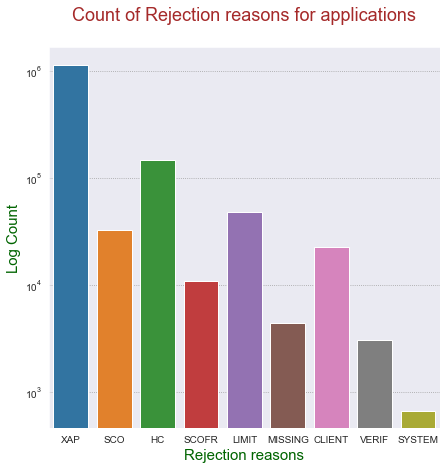

In [151]:
plt.figure(figsize=(7, 7))
sns.countplot(x = 'CODE_REJECT_REASON', data = merged_df)
plt.title('Count of Rejection reasons for applications\n',  fontdict = {'fontsize': '18', 
                                                                        'fontweight': '5', 'color': 'brown'})
plt.xlabel('Rejection reasons', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
plt.ylabel('Log Count', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
plt.yscale('log')
plt.show()

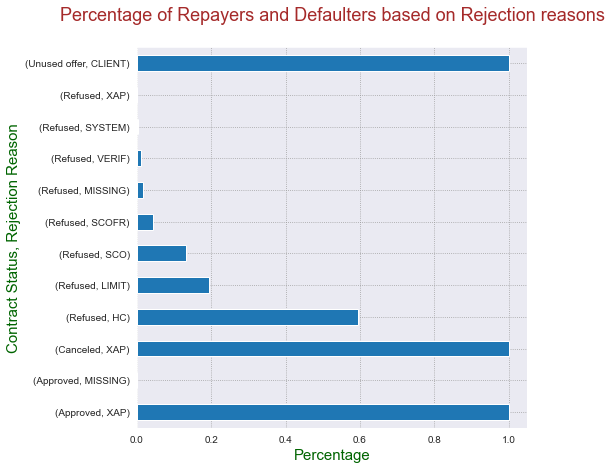

In [179]:
plt.figure(figsize=(7, 7))
merged_df.groupby(by = 'NAME_CONTRACT_STATUS')['CODE_REJECT_REASON'].value_counts(normalize=True).plot(kind = 'barh')
plt.title('Percentage of Repayers and Defaulters based on Rejection reasons\n',  fontdict = {'fontsize': '18', 
                                                                        'fontweight': '5', 'color': 'brown'})

plt.xlabel('Percentage', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
plt.ylabel('Contract Status, Rejection Reason', fontdict = {'fontsize': '15', 'fontweight': '5', 'color': 'darkgreen'})
plt.show()

**`Inference`**
- `XAP` has high count in applications which means where the loan was approved else cancelled by client and hence the attribute was not applicable there.
- There are various different reasons for disapproval which are not defined anywhere to us. But we observe that the reason `HC` has been most frequent for the same.
- In contract status unused we can see reason as client which tells that client himself/ herself was responsible for either disapproval or not using and thus cancellation of loan.

In [153]:
merged_df.groupby(by = ['NAME_CONTRACT_STATUS', 'TARGET'])['CODE_REJECT_REASON'].value_counts(normalize=True)*100

NAME_CONTRACT_STATUS  TARGET  CODE_REJECT_REASON
Approved              0       XAP                    99.999023
                              MISSING                 0.000977
                      1       XAP                   100.000000
Canceled              0       XAP                   100.000000
                      1       XAP                   100.000000
Refused               0       HC                     59.667889
                              LIMIT                  19.343650
                              SCO                    13.601634
                              SCOFR                   3.981903
                              MISSING                 1.818923
                              VERIF                   1.293806
                              SYSTEM                  0.291731
                              XAP                     0.000463
                      1       HC                     58.190094
                              LIMIT                  20.381819
      

**`Inference`**
- Here we can see that the previous applicants whose offer was rejected by reason `HC` are equally likely to repay or default. So, this needs a thorough investigation.

***

## [5. Factors affecting clients with repayment difficulties with some suggestions](#factors-affecting-clients-with-repayment-difficulties)

<div class="alert alert-block alert-success">

1. **Age_group**:<br>Clients from in the age group of 20-30 are more likely to default.<p> Here, we can't deny that few loans might be genuine which can be student loans. Excluding them we can deny loans for other potential defaulter client in these age group. Else, offering loan with high rate of interest.
 
    
2. **Organization type**:<br>The Organization type having defaulting rate above 10% are extremely risky namely : *Transport type 3, Industry Type (13, 8, 1, 3, 4), Restaurant, Construction, Cleaning, Agriculture, Self-Employed.* <p> Well, all these are types of business and business always is done on risk. It may happen that due to unfortunate circumstances they might succumb losses, their clients are not prompt in payment etc. We can mitigate this risk with higher interest rate, reducing the amount of loan or shorten the period of installments.
   
    
3. **Gender**:<br>Men have higher default rate.<p> Here, our analysis tells that there is bias in repayment but that should not lead us to be biased for offering loan based on gender. One must consider other factors in conjunction with gender.
  
    
4. **Income type**: <br> Clients who are Unemployed or are on maternity leave are most likely to default.<br>
<p> Well, it is obvious that clients who are unemployed will defer to repay, but here there's a catch.<br>
So what if they want to start new venture, well we must take some of the relating factors into account and likewise formulate strategies.</p>
<p> Maternity leave is related to feamle clients. There might be situation where they need loan for hospital expenses. We must offer them loan but may  be with less credit or/ and higher interest rate.</p>
    
    
5. **Education Type**:<br> Applicants who completed lower secondary education are likely to default.
<p> We must factor in other factors too since just education type can't govern the lending process.

    
6. **Family status**:<br> The default rate for every category in this attribute is below 10%, here you need to devise strategies which will increase the repaymen rate.
<p> If suppose the threshold for defaulting clients is 10% from overall applications then we can't consider them risky. Considering, other varibales in combination we can come up with resonable offer.

    
7. **Housing Type**:<br> Clients residing in rented apartment and those with parents have high percentage of default.
<p> This is a concerning factor. No doubt that rented apartment dwellers already have burden of the rent, family expenses and other.<br>
    Those staying with parents might be in some critical situations where they are trying to make their both ends meet.
    Therefore here we would suggest to thoroughly analyse the data as well as in person inspection will be of great deal and then come to best offer.
    </p>

    
8. **Occupation type**:<br> As with organization variable applicants with more than 10% rate of default are risky.
<p> The analysis tell us that most of the defaulters top defaulters are worker category. These clients might be earning on daily basis, hence we are seeing high default rate. Nonetheless, they are surely risky and we should take care of that by offering a proposal which will psuh them towards cancelling the application.</p>

    
9. **Employment years**:<br> Most defaulters are those who are employed for less than 1 year. 
<p> This attribute alone is not enough. Therefore we must probe and take in all other factors. </p>

    
10. **Income amount**:<br> Defaulters are more likely in the income range of 1-2 lakhs.
<p> This is probably their early income and if they are taking credit out of their league which definitely lead to loss for the lender. Again its best to offer them loan with higher interest, higher annuity and/or less credit.
    </p>

    

11. **Credit amount** & **Goods price amount**:<br> Strategies must be devised for those in the range of 3-6 lakhs of credit amount and goods pricd amount for lowering their default rate.

    
12. **Previous application loan purpose**:<br> Repairs have seen most number of defaulters. These are high risk customers.
    <p> If these are repeaters then  it's best to avoid them.